#### Author: Peco Myint
#### Last edit: 07/12/2019

# Data and parameters initialization

In [41]:
import numpy as np
from numpy import r_
import scipy as sp
from scipy import optimize # for savitzky golay
from scipy import signal #used for savitzky golay smoothening
from ipywidgets import interactive #for interactive plotting / making a movie for the scatterin events
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt #plotting figures
from matplotlib.pyplot import figure,plot,imshow
import time #for timing
from tqdm import tqdm_notebook as tqdm #for progress bar
import matplotlib as mpl
mpl.rcParams['image.origin']='lower'
mpl.rcParams['image.interpolation']='none'
mpl.rcParams['figure.max_open_warning']=40
import datadesc as DD
import glob, os
DD.DD={}

############################################################################################################
########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input start     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
############################################################################################################
"""
Edit the following if you want to look at a different data file
"""
DD.DD['Datalabel'] = 'A017'
"""
Find the right data file. you will have to researt the Kernel if python can't find 
the following file. That means data file is loaded and Jupyter is looking
at a different directory now
"""
%run -i '/projectnb/ludwiggrp/Peco Myint/Ma_APS_Apr_2018/ludwig201804/Read_metadata.py'

#run -i '/projectnb/ludwiggrp/Peco Myint/Mahsa_APS Nov 2017/ludwig201711/Read_metadata.py'
############################################################################################################
########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input end     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
############################################################################################################

#look at some of the information on data set, stored in DD
for k in sorted(DD.DD.keys()):
    print("DD.DD[{:s}]={}".format(k,DD.DD[k])) #print all the metadata

#provode necessary values for data analysis
global ccdx, ccdz, x0, y0, ccdx0, ccdz0, d, E, alpha_i, datatakingtime
#ccd positions during data acquisition
ccdx=DD.DD['ccdx']
ccdz=DD.DD['ccdz']

#incident beam info
x0 = DD.DD['x0'] 
y0 = DD.DD['y0'] 
ccdx0=DD.DD['ccdx0']
ccdz0=DD.DD['ccdz0']

#the following are detector distance, Energy and incident angles
d=DD.DD['rr']
E=DD.DD['energy']*1.602*1E-16
alpha_i=DD.DD['nominal_angle']*(np.pi/180)

#time used to take a single frame
datatakingtime = DD.DD['preset']

%matplotlib notebook

total time: 0.004157304763793945
DD.DD[Datafolder]=A017_sample5_SiO2_Ion65deg_2kev_f3_7.0EN5_0p2deg_5secExpo_15secWait_001
DD.DD[Datalabel]=A017
DD.DD[airgap]=240
DD.DD[batchinfo]=A017_sample5_SiO2_Ion65deg_2kev_f3_7.0EN5_0p2deg_5secExpo_15secWait_001_0001-1820.batchinfo
DD.DD[batchinfo_ver]=14
DD.DD[bstop]=130
DD.DD[ccd_speed]=1
DD.DD[ccdroi]=[1, 516, 1, 1556]
DD.DD[ccdx]=171
DD.DD[ccdx0]=212.5
DD.DD[ccdxspec]=190
DD.DD[ccdz]=66
DD.DD[ccdz0]=36.5
DD.DD[ccdzspec]=89
DD.DD[child]=A017_sample5_SiO2_Ion65deg_2kev_f3_7.0EN5_0p2deg_5secExpo_15secWait_001/
DD.DD[close_delay]=0.002
DD.DD[col_beg]=0
DD.DD[col_end]=1555
DD.DD[cols]=1556
DD.DD[compression]=0
DD.DD[darkname]=/projectnb/ludwiggrp/Peco Myint/Ma_APS_Apr_2018/ludwig201804/A017_sample5_SiO2_Ion65deg_2kev_f3_7.0EN5_0p2deg_5secExpo_15secWait_001/A017_sample5_SiO2_Ion65deg_2kev_f3_7.0EN5_0p2deg_5secExpo_15secWait_001_00001-02000.imm
DD.DD[data_scanN]=192
DD.DD[datafilename]=A017_sample5_SiO2_Ion65deg_2kev_f3_7.0EN5_0p2deg_5secExpo_15secW

# Get rid of module connections, interpolate the gaps, Smoothen data and plotting

In [42]:
"""Load the functions to do correct the modules' gap and apply SG smoothening"""
%run -i '/projectnb/ludwiggrp/Peco Myint/Interpolate_and_SG.py'

"""Look inside the Interpolate_and_SG.py file to see what funcations are available"""

'Look inside the Interpolate_and_SG.py file to see what funcations are available'

# Plot a frame & see the scattering pattern evolve

<IPython.core.display.Javascript object>


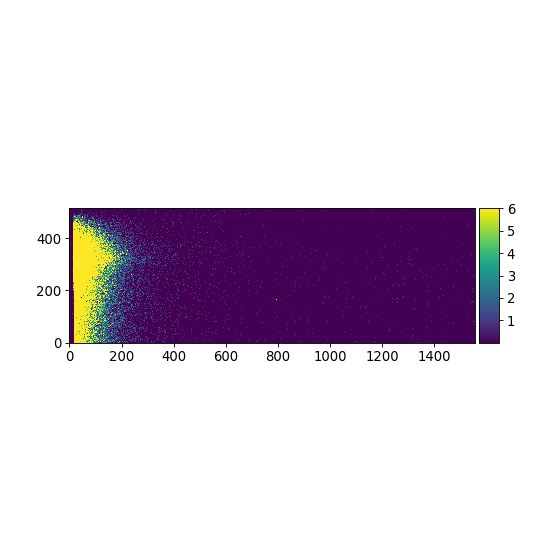

In [43]:
#Plot any frame
%matplotlib notebook
%matplotlib notebook

from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.figure(figsize=(7,7))
ax = plt.gca()

############################################################################################################
########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input start     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
############################################################################################################
"""
Define what frame you would like to look at
"""
frame_no = 1100
min_scale = 0.01
max_scale = 6
############################################################################################################
########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input end     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
############################################################################################################


im = imshow(DD.FD.rdframe(frame_no),vmin = min_scale, vmax= max_scale)
plt.grid(False)


# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
#print(DD.FD.rdframe(3)[295:305,295:305])

# The following is to show the differences between smoothening with or without interpolation

## 1. Smoothen images *without* any modular and beam stop area *correction*

Sivitzky-golay smoothening time taken = 0.03418254852294922


<IPython.core.display.Javascript object>


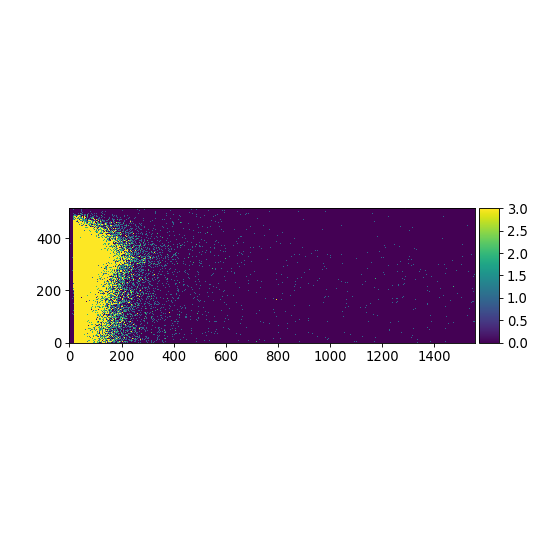

<IPython.core.display.Javascript object>


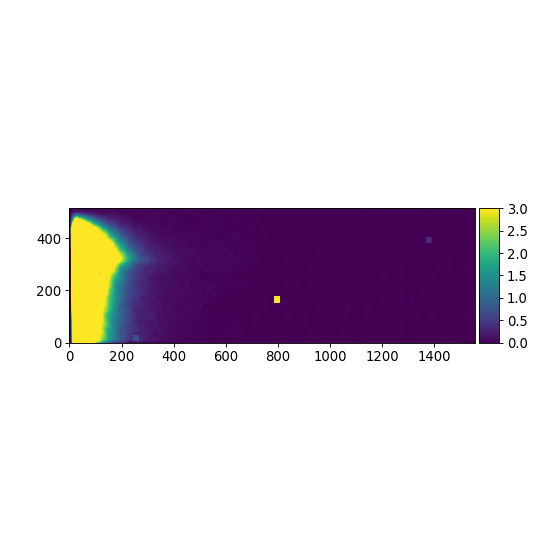

In [44]:
"""
select a frame which you want to smoothen in the following
"""
############################################################################################################
########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input start     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
############################################################################################################
detector_img = DD.FD.rdframe(1100)

boxsize=23
smoothening_order=1
max_value = 3
min_value = 0
############################################################################################################
########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input end     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
############################################################################################################

Zn = detector_img
ta= time.time()
Zf = sgolay2d( Zn, window_size=boxsize, order=smoothening_order)
tb= time.time()
print('Sivitzky-golay smoothening time taken = {0}'.format(tb-ta))


# do plotting and compare

#unfiltered
plt.figure(figsize=(7,7))
ax = plt.gca()


im = imshow(Zn,vmin = min_value, vmax=max_value)
plt.grid(False)


# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

#smoothened
plt.figure(figsize=(7,7))
ax = plt.gca()


im = imshow(Zf,vmin = min_value, vmax=max_value)
plt.grid(False)


# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()



## 2. Get rid of modular connections, beam stop area, interpolate and then smoothen

<IPython.core.display.Javascript object>


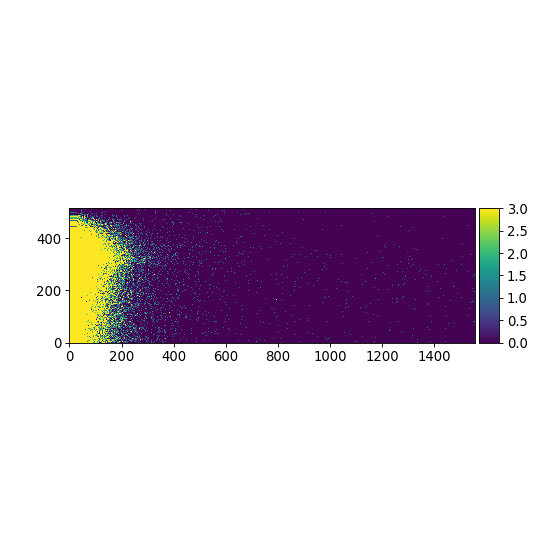

/projectnb/ludwiggrp/Peco Myint/Interpolate_and_SG.py:107: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return(full_image, full_padded.as_matrix(), np.ndarray.tolist(full_image == 0))


<IPython.core.display.Javascript object>


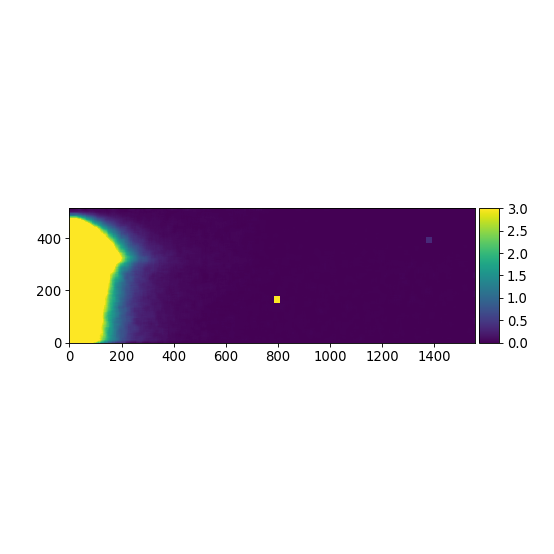

In [45]:
%matplotlib notebook

plt.figure(figsize=(7,7))
ax = plt.gca()
imshow(eliminate_module_beamstop(detector_img)[1],vmin = min_value, vmax=max_value)
plt.grid(False)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

plt.figure(figsize=(7,7))
ax = plt.gca()
imshow(sgolay2d(eliminate_module_beamstop(detector_img)[1],window_size=boxsize, order=smoothening_order),vmin = min_value, vmax=max_value)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()


## 3. Smoothen each modules and then put them back onto dector image
### Doesn't work very well. Not optimum for setting ROIs

<IPython.core.display.Javascript object>


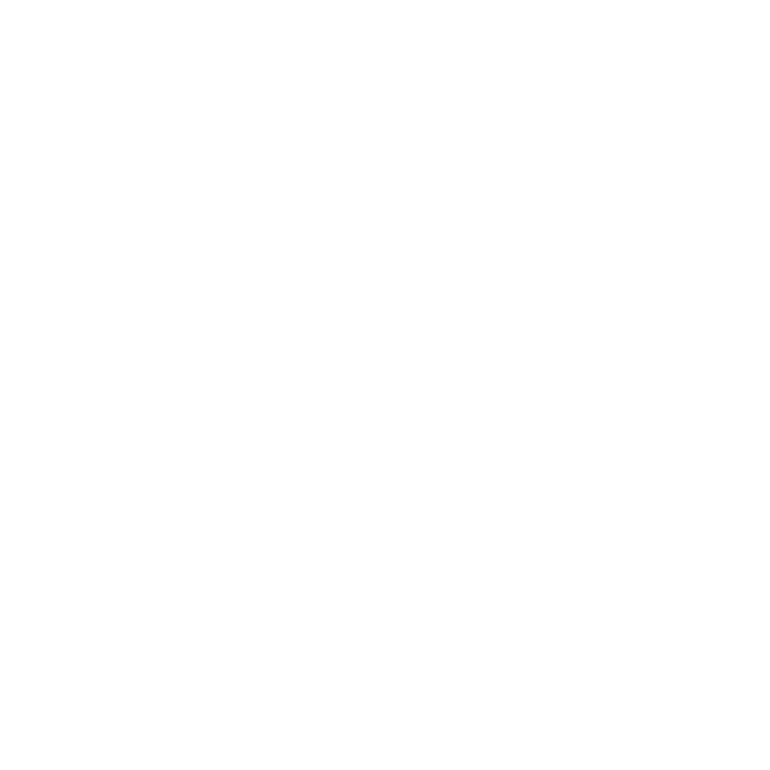

In [6]:
set_der = None

plt.figure(figsize=(7,7))
ax = plt.gca()
imshow(eliminate_module_beamstop_smootheachmodule(detector_img)[0],vmin = min_value, vmax=max_value)
plt.grid(False)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()


<IPython.core.display.Javascript object>


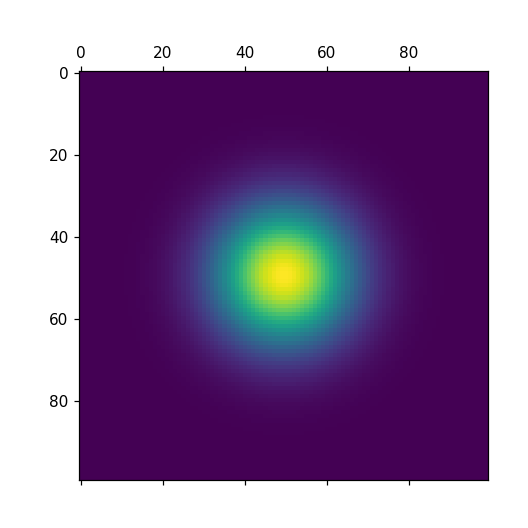

<IPython.core.display.Javascript object>


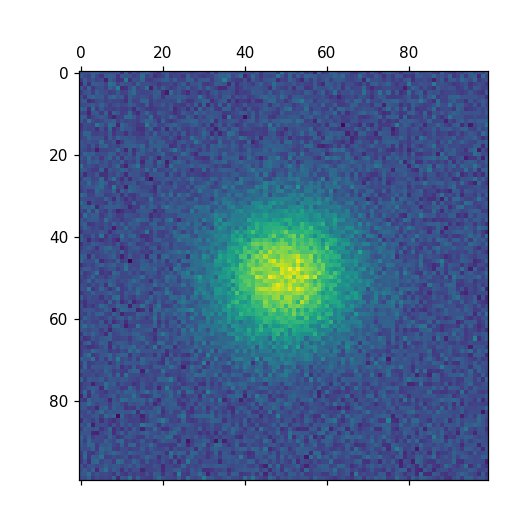

<IPython.core.display.Javascript object>


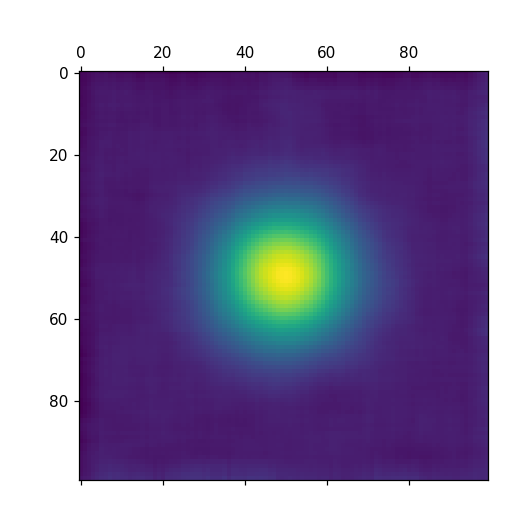

'\n#the following is testing whether the circular mask is better for smoothening to get rid of edge effect\na, b = 1, 1\nn = 100\nr = 40\ny,x = np.ogrid[-a:n-a, -b:n-b]\nmask = x*x + y*y <= r*r\nZmf = sgolay2d( Zm, window_size=33, order=2)\nplt.matshow(Zm)\n'

In [7]:
"""
sample code to show smothening's issue. SG introduces some slight background noise

Play with window_size and order to see how well it smoothens. consider the center bright spot
as the speckle
"""
%matplotlib notebook
# create some sample twoD data
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X, Y = np.meshgrid(x,y)
Z = np.exp( -(X**2+Y**2))

# add noise
Zn = Z + np.random.normal( 0, 0.09, Z.shape )

# filter it
Zf = sgolay2d( Zn, window_size=11, order=1)
#Zm = Zn[mask]



# do some plotting
plt.matshow(Z)
plt.matshow(Zn)
plt.matshow(Zf)

"""
#the following is testing whether the circular mask is better for smoothening to get rid of edge effect
a, b = 1, 1
n = 100
r = 40
y,x = np.ogrid[-a:n-a, -b:n-b]
mask = x*x + y*y <= r*r
Zmf = sgolay2d( Zm, window_size=33, order=2)
plt.matshow(Zm)
"""


# End of smoothening tests.

# The following is to find the right smoothening parameters

## Look through slices and see how the smoothened data looks compared to actual data. Apply chi-squre and p-value test. the crosssection of pvalue and chisqure seems to be a optimal choice. 

correction and Savitzky-golay smoothening time taken = 5.471299171447754
11


/projectnb/ludwiggrp/Peco Myint/Interpolate_and_SG.py:107: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return(full_image, full_padded.as_matrix(), np.ndarray.tolist(full_image == 0))


<IPython.core.display.Javascript object>


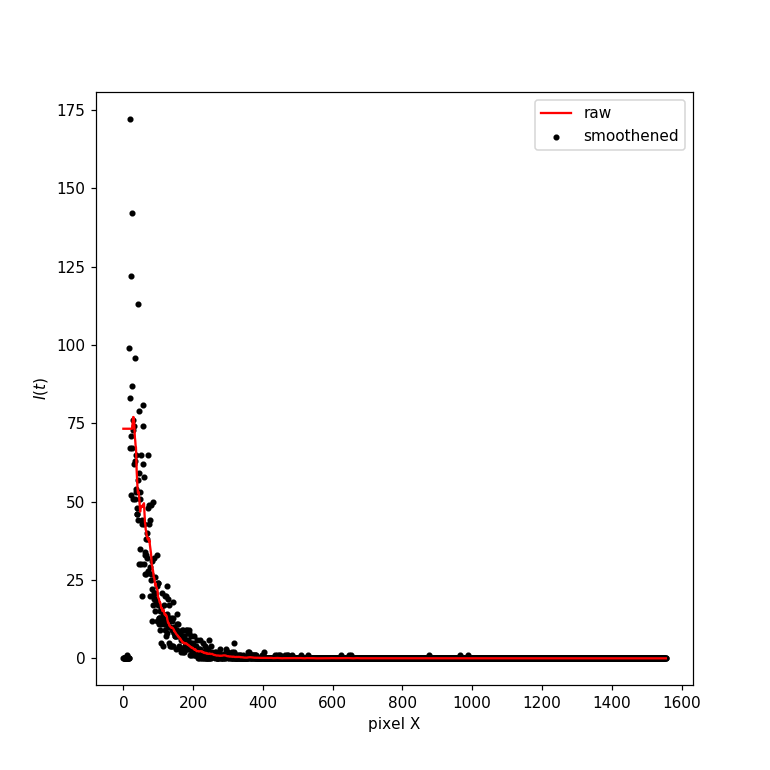

<IPython.core.display.Javascript object>


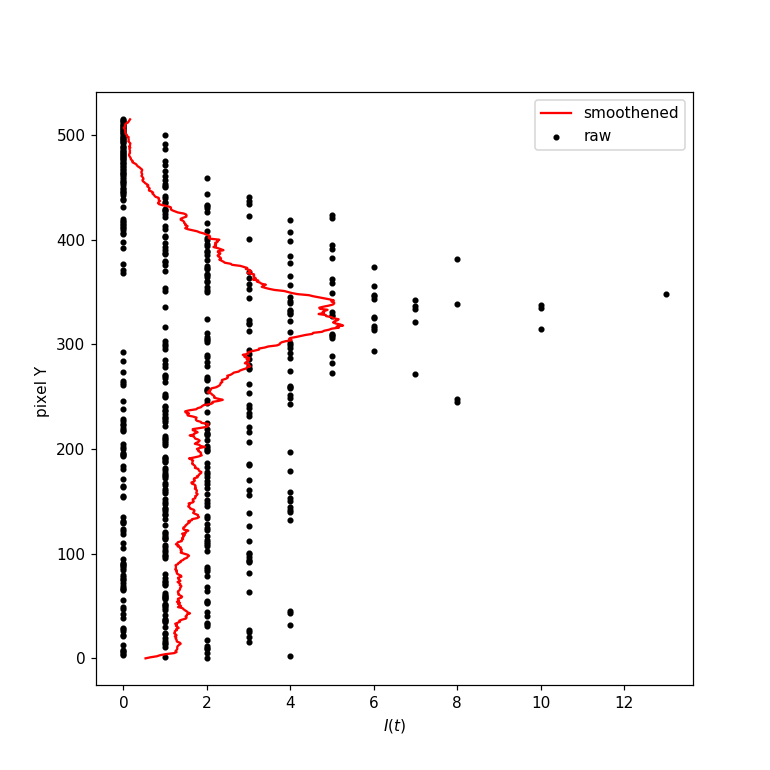

correction and Savitzky-golay smoothening time taken = 1.6166186332702637
13


<IPython.core.display.Javascript object>


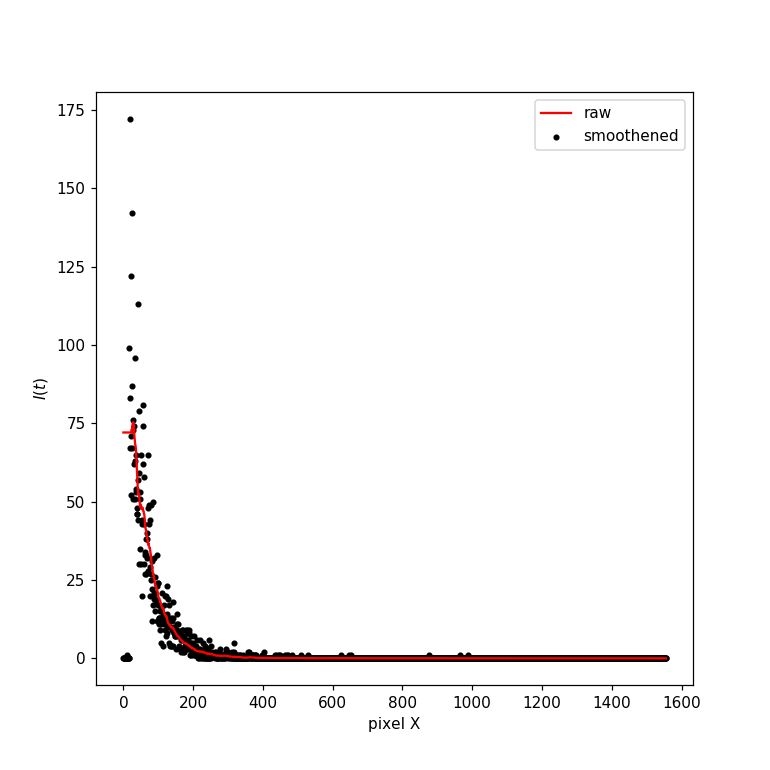

<IPython.core.display.Javascript object>


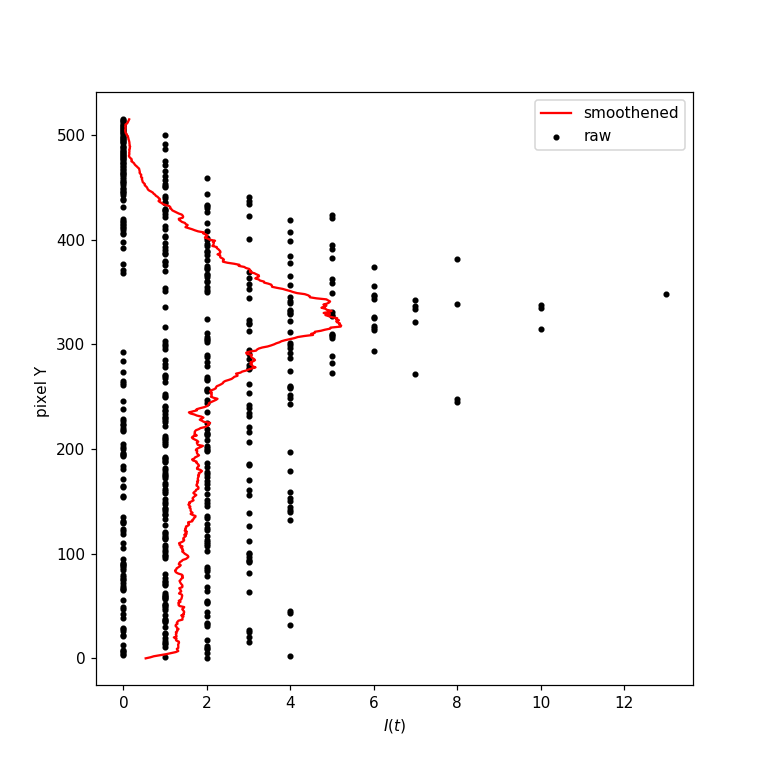

correction and Savitzky-golay smoothening time taken = 1.6144678592681885
15


<IPython.core.display.Javascript object>


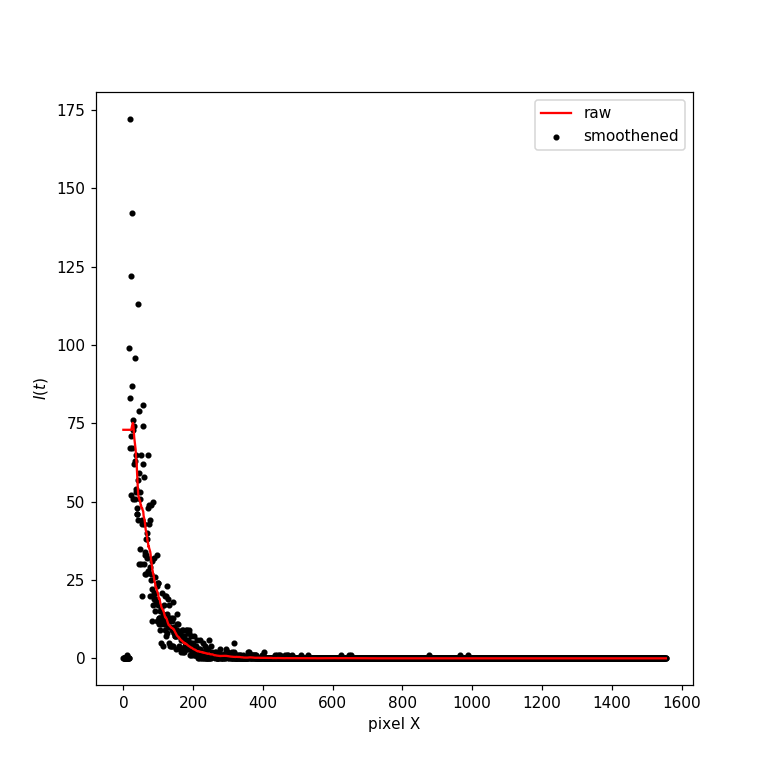

<IPython.core.display.Javascript object>


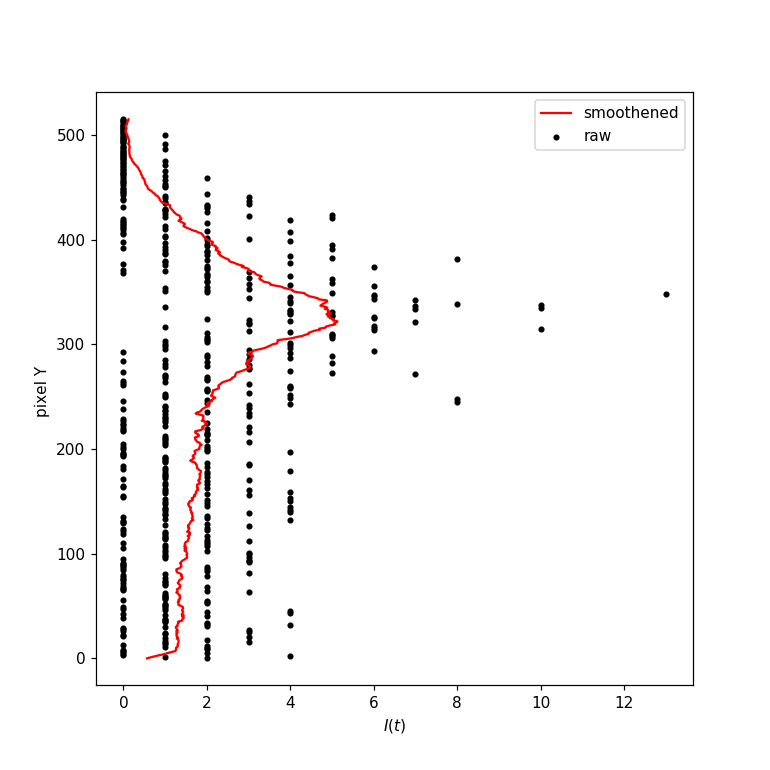

correction and Savitzky-golay smoothening time taken = 1.6153643131256104
17


<IPython.core.display.Javascript object>


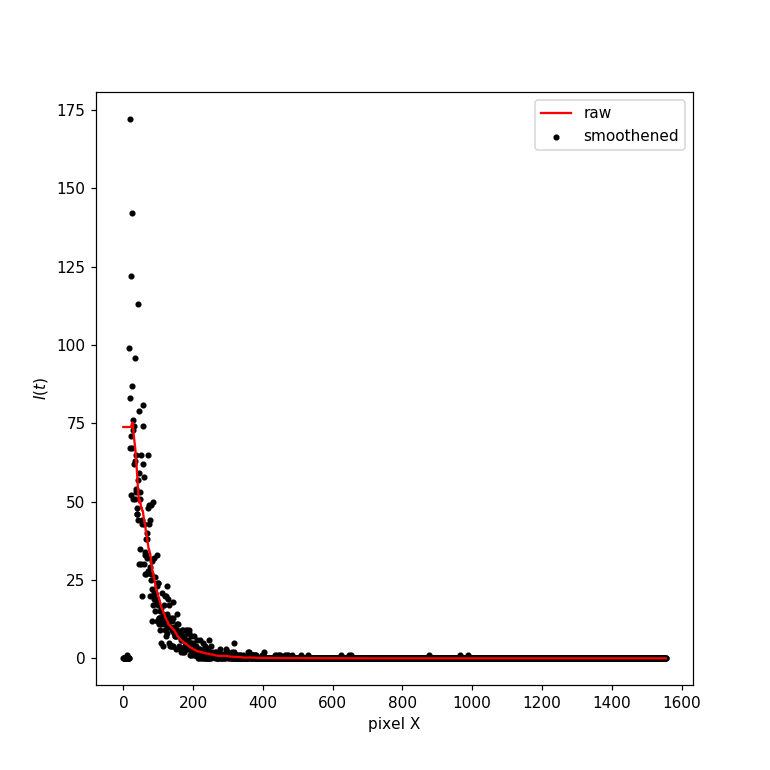

<IPython.core.display.Javascript object>


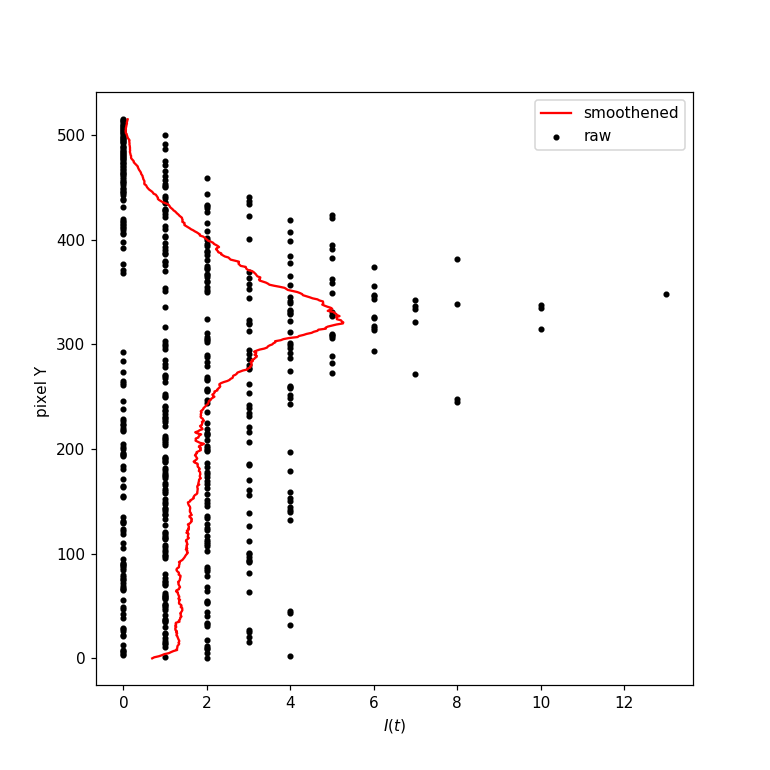

correction and Savitzky-golay smoothening time taken = 1.6118059158325195
19


<IPython.core.display.Javascript object>


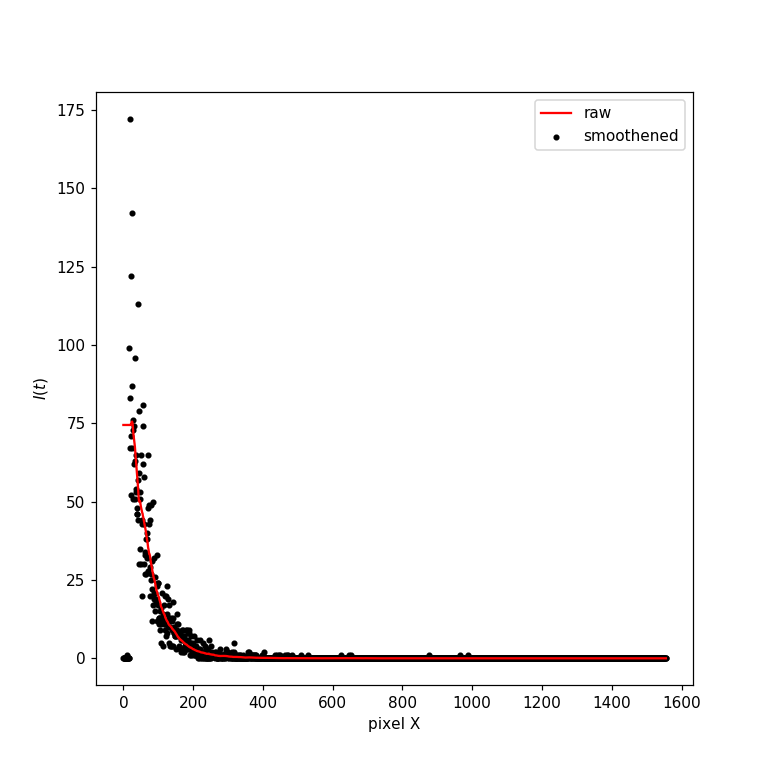

<IPython.core.display.Javascript object>


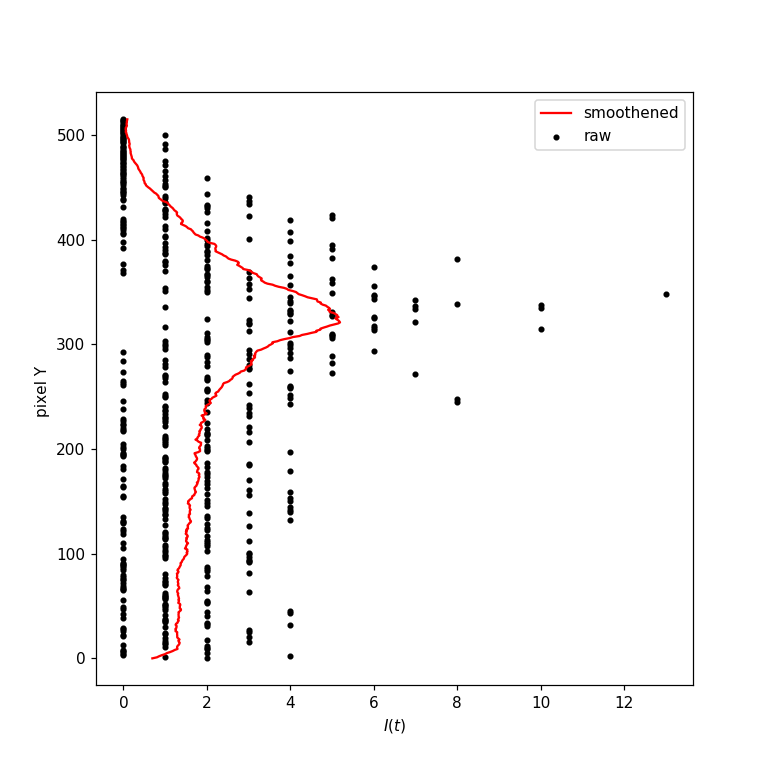

correction and Savitzky-golay smoothening time taken = 1.6650505065917969
21


<IPython.core.display.Javascript object>


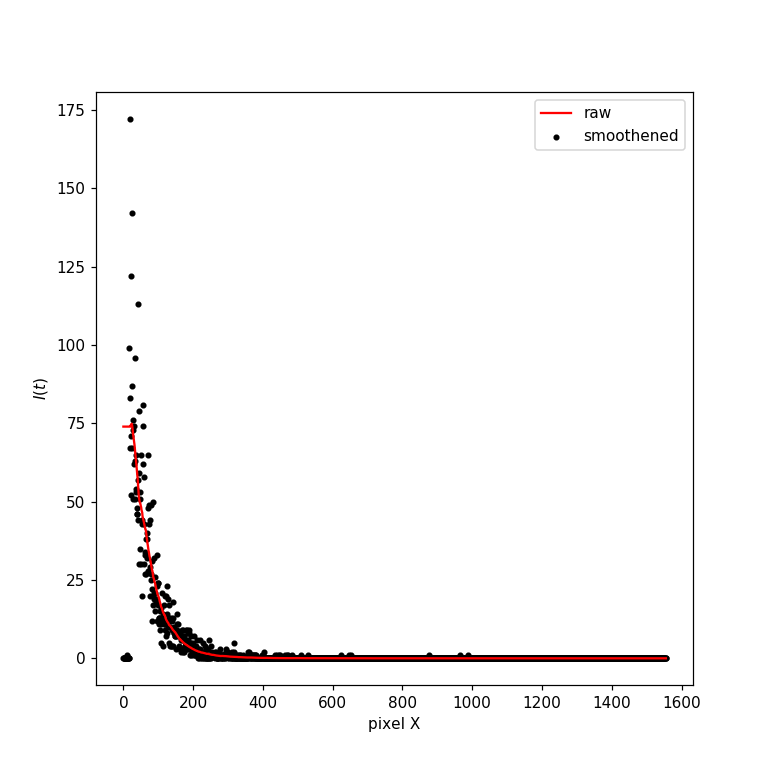

<IPython.core.display.Javascript object>


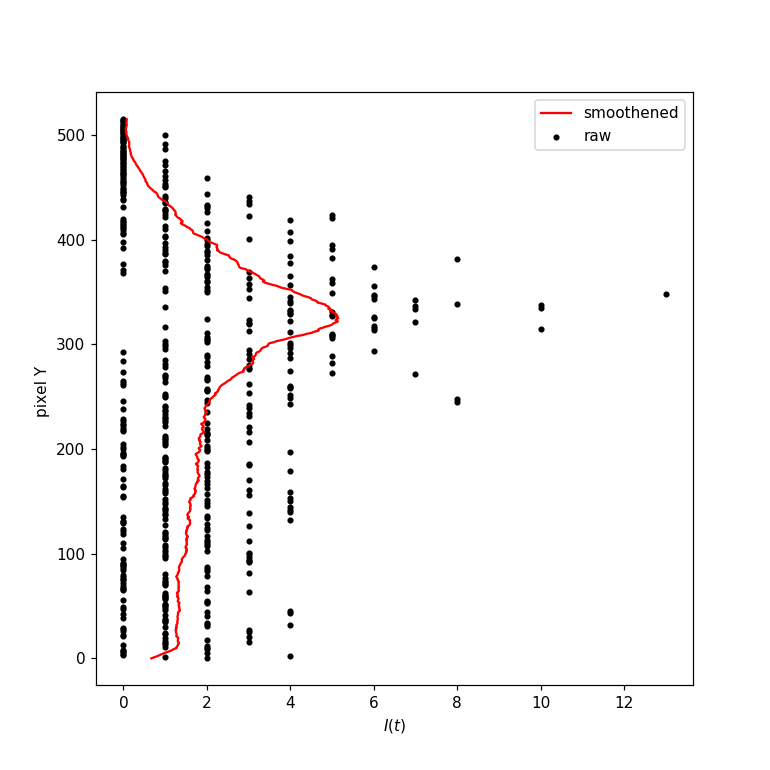

correction and Savitzky-golay smoothening time taken = 1.626591682434082
23


<IPython.core.display.Javascript object>


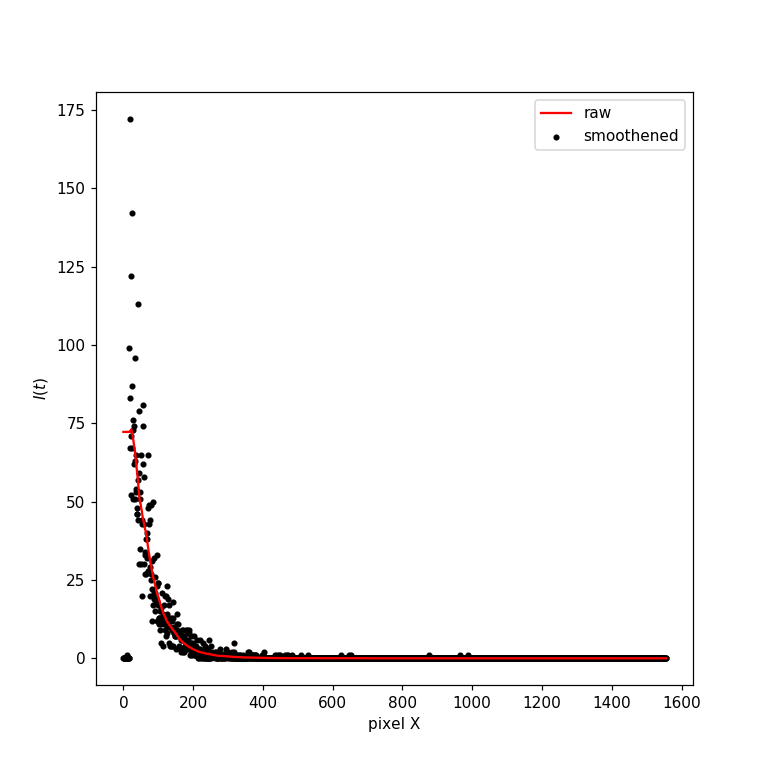

<IPython.core.display.Javascript object>


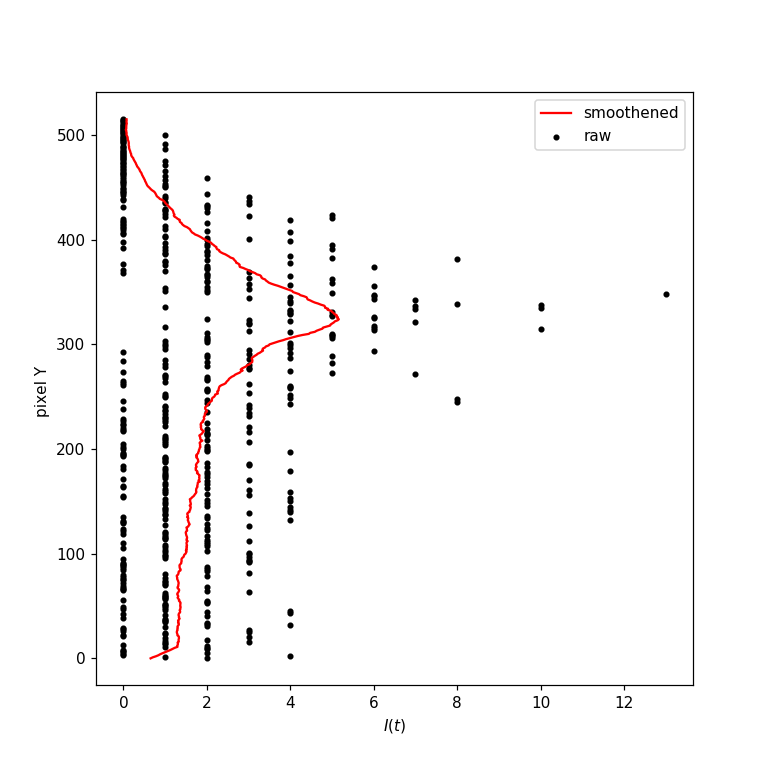

correction and Savitzky-golay smoothening time taken = 1.6175072193145752
25


<IPython.core.display.Javascript object>


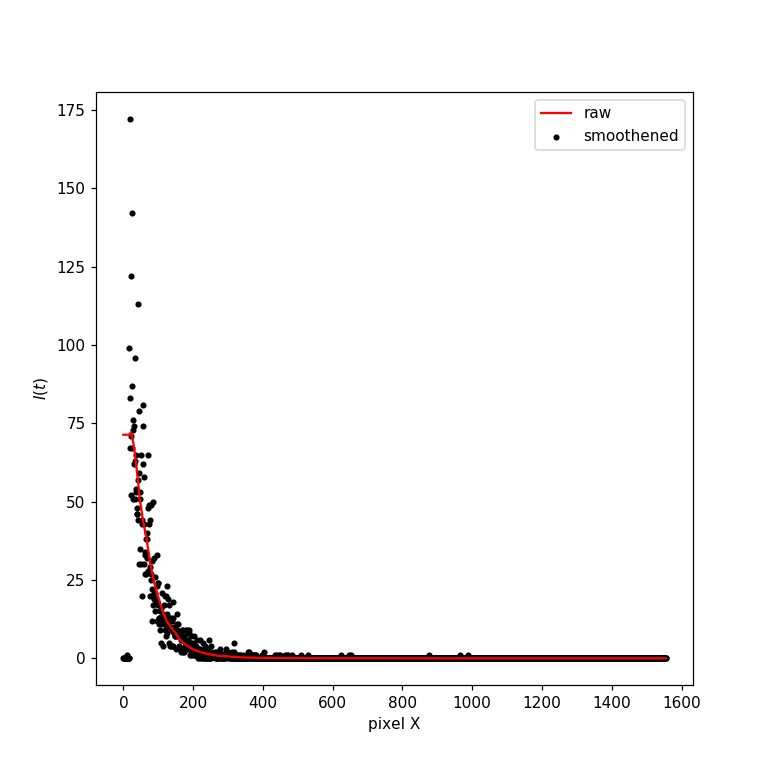

<IPython.core.display.Javascript object>


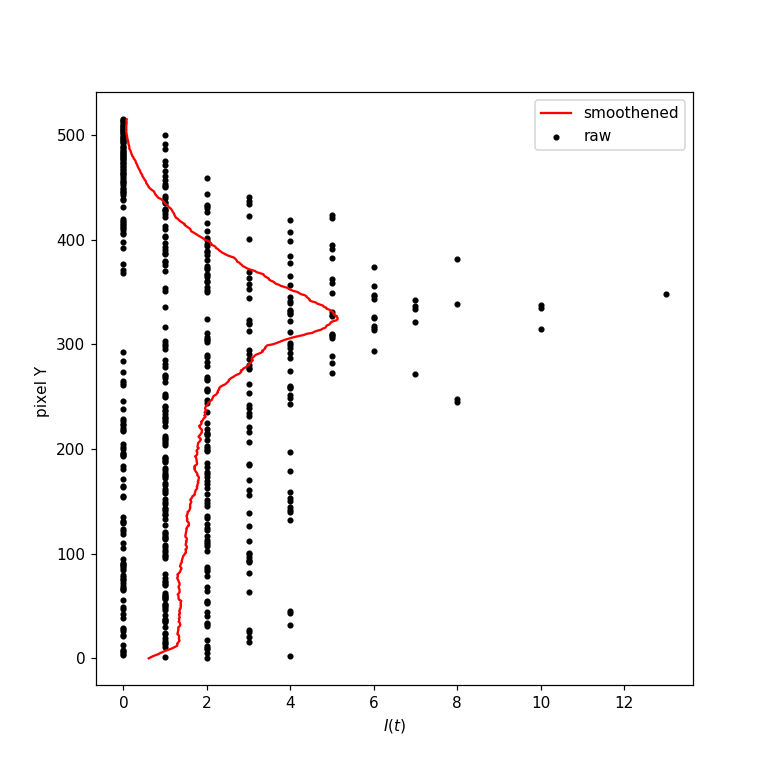

correction and Savitzky-golay smoothening time taken = 1.611341953277588
27


<IPython.core.display.Javascript object>


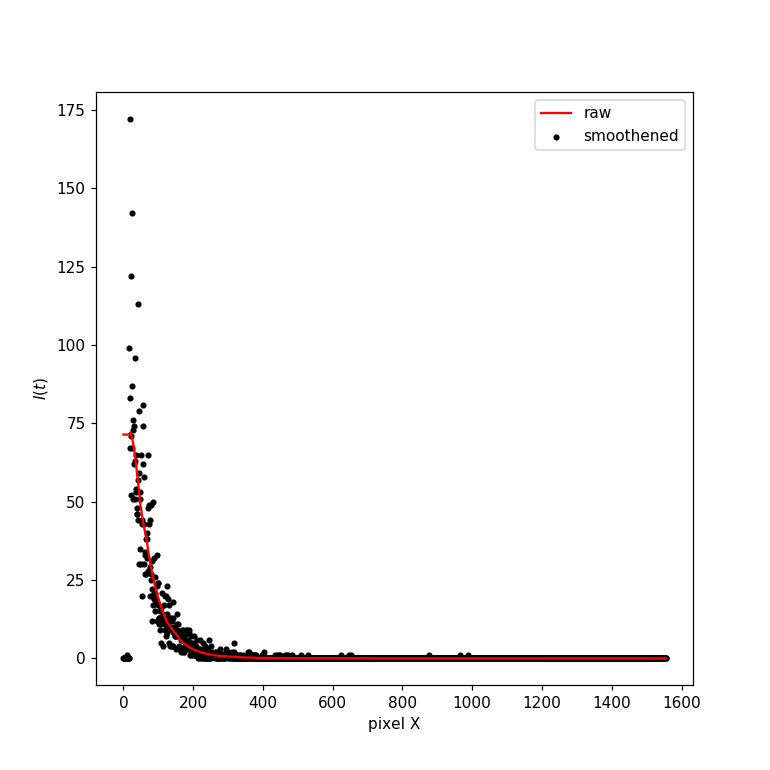

<IPython.core.display.Javascript object>


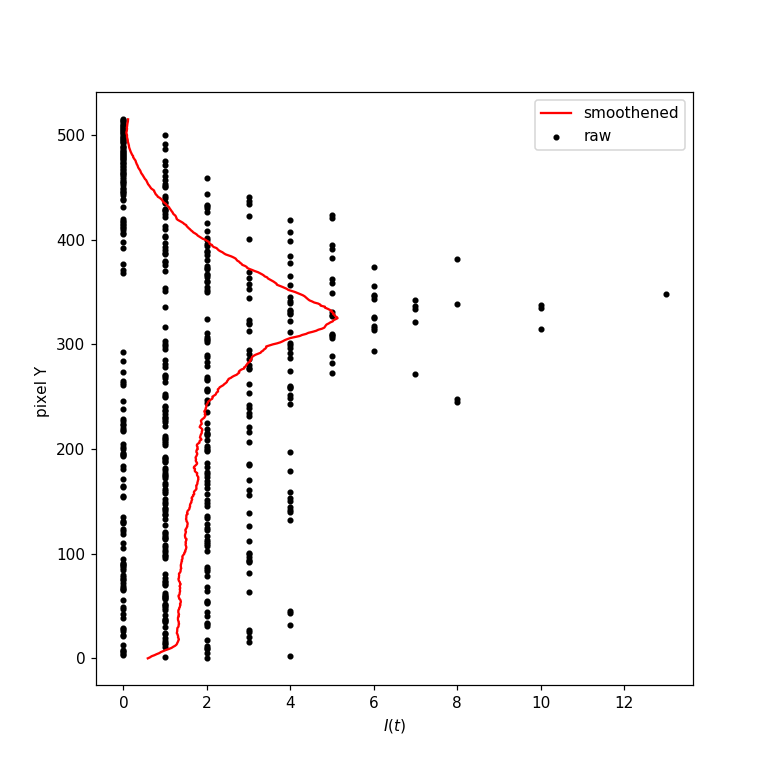

correction and Savitzky-golay smoothening time taken = 1.6105597019195557
29


<IPython.core.display.Javascript object>


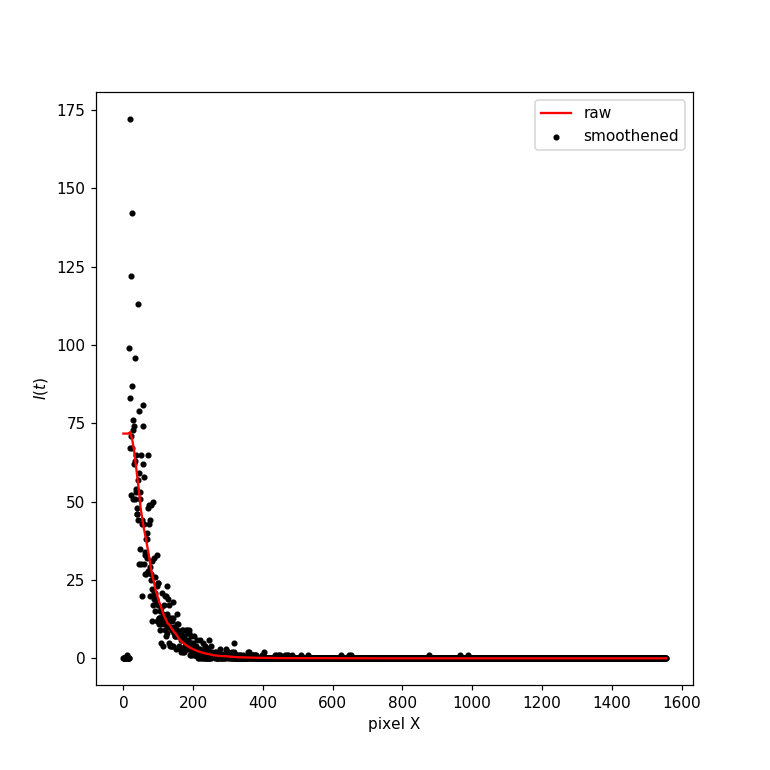

<IPython.core.display.Javascript object>


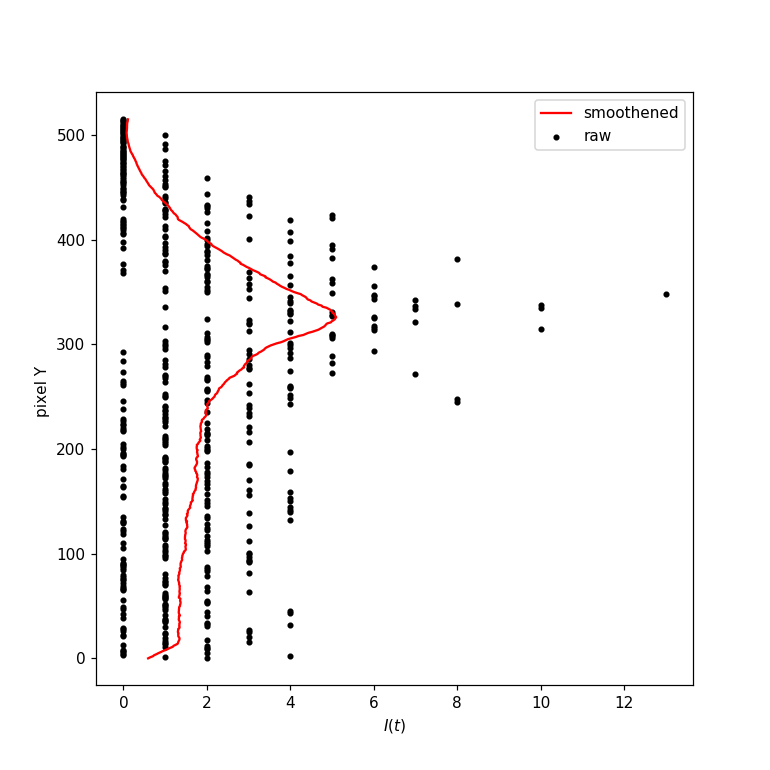

correction and Savitzky-golay smoothening time taken = 1.6106231212615967
31


<IPython.core.display.Javascript object>


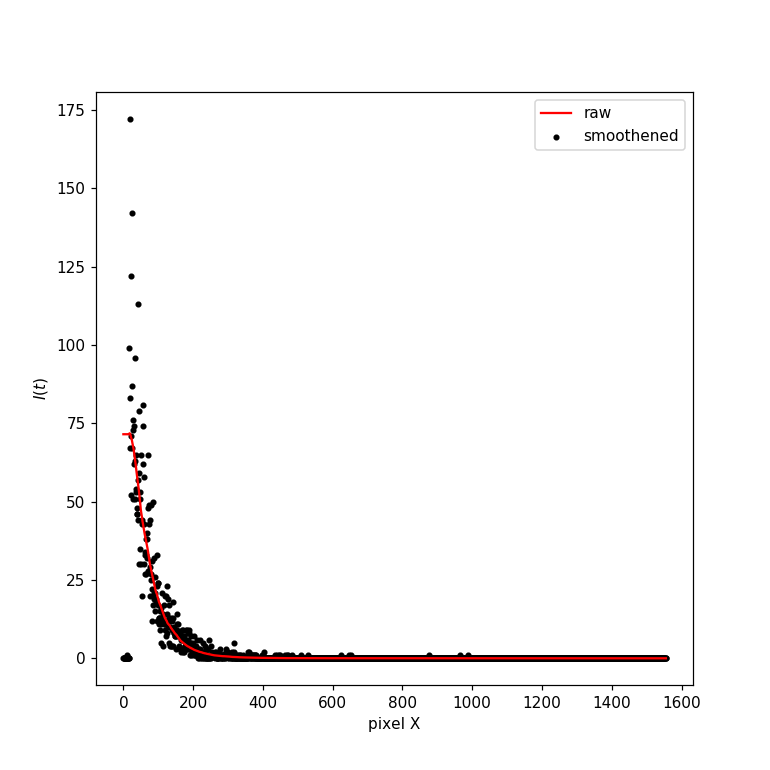

<IPython.core.display.Javascript object>


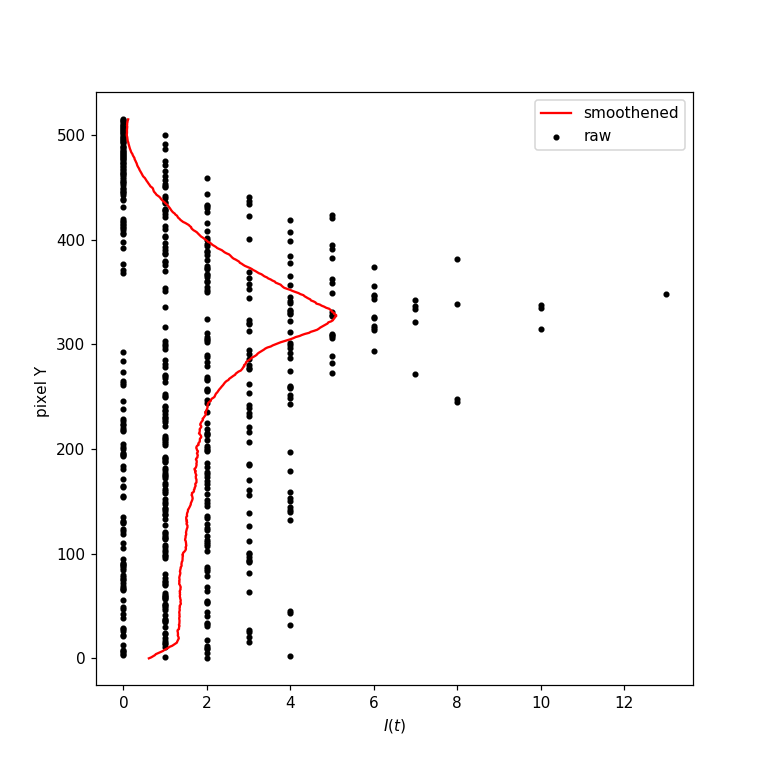

correction and Savitzky-golay smoothening time taken = 1.6245641708374023
33


<IPython.core.display.Javascript object>


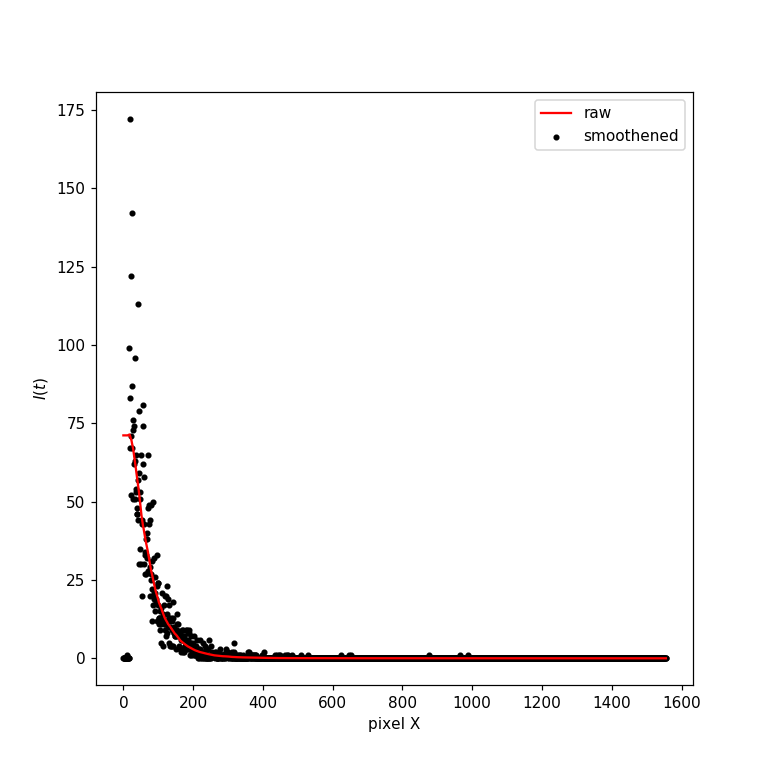

<IPython.core.display.Javascript object>


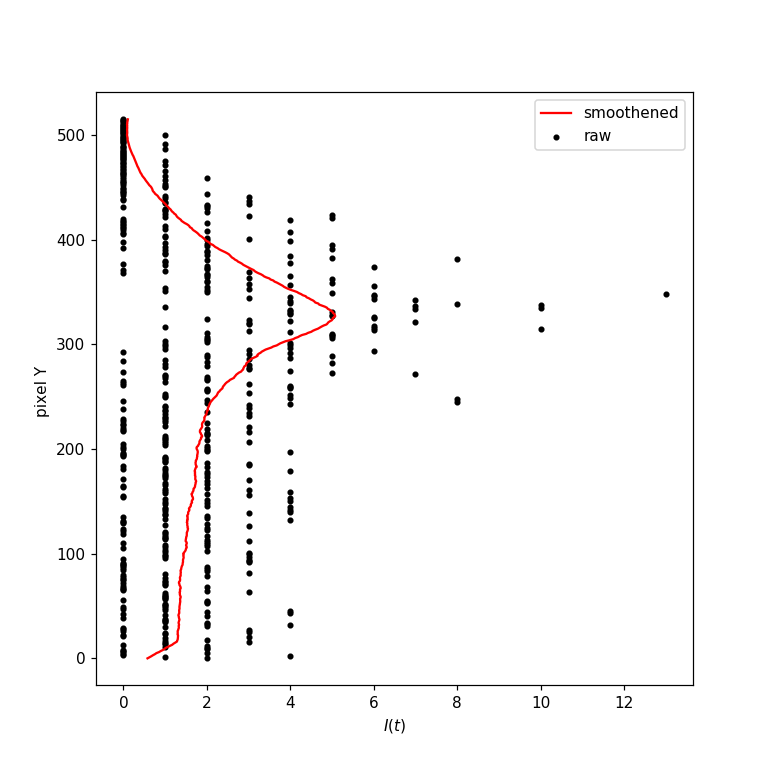

correction and Savitzky-golay smoothening time taken = 1.6301226615905762
35


<IPython.core.display.Javascript object>


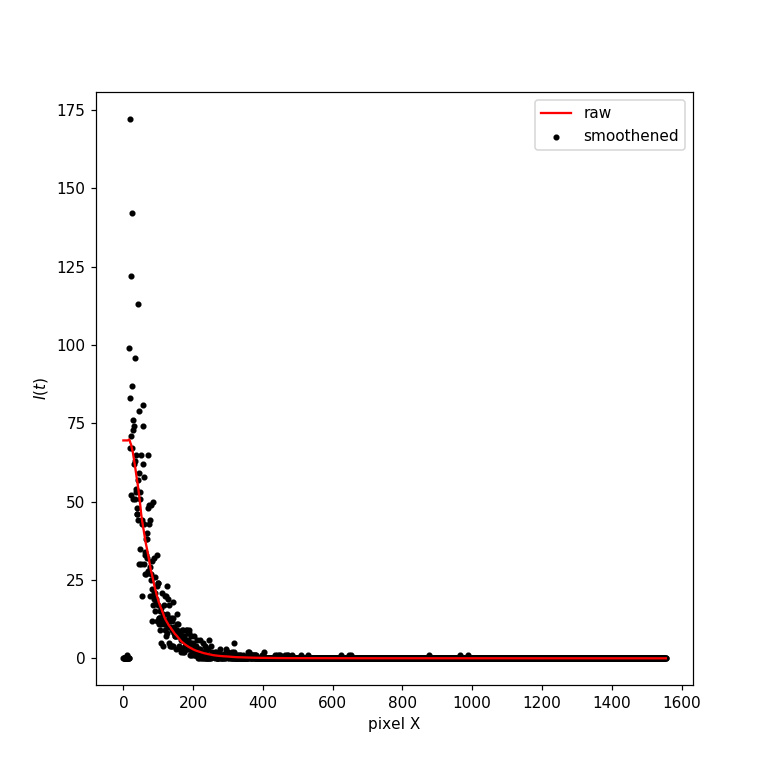

<IPython.core.display.Javascript object>


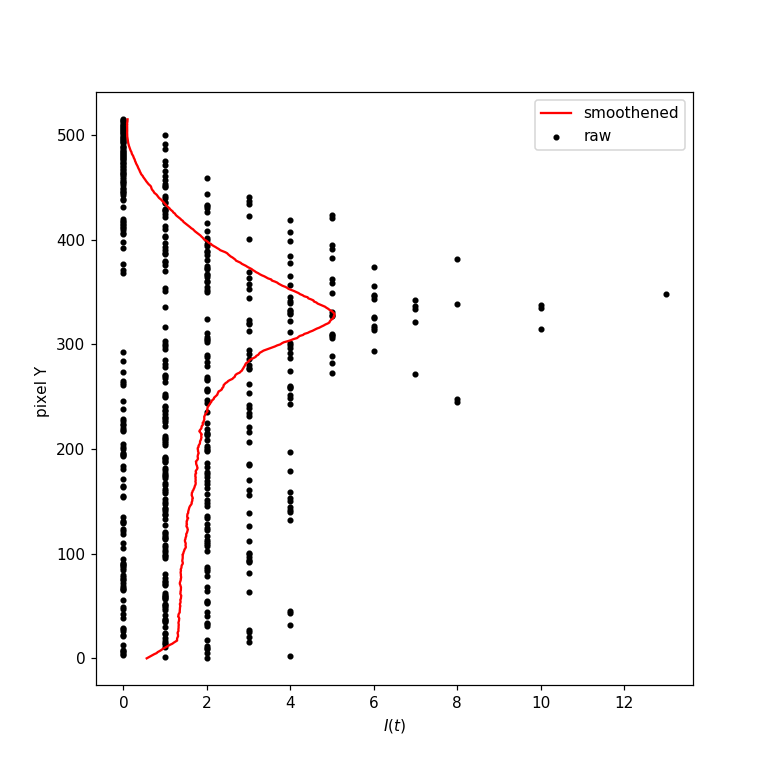

correction and Savitzky-golay smoothening time taken = 1.6515159606933594
37


<IPython.core.display.Javascript object>


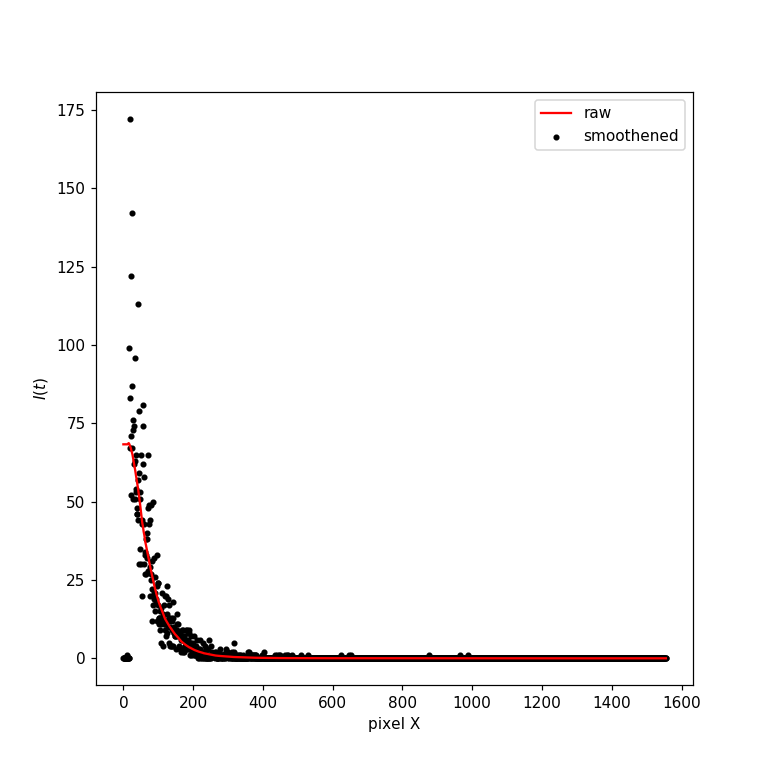

<IPython.core.display.Javascript object>


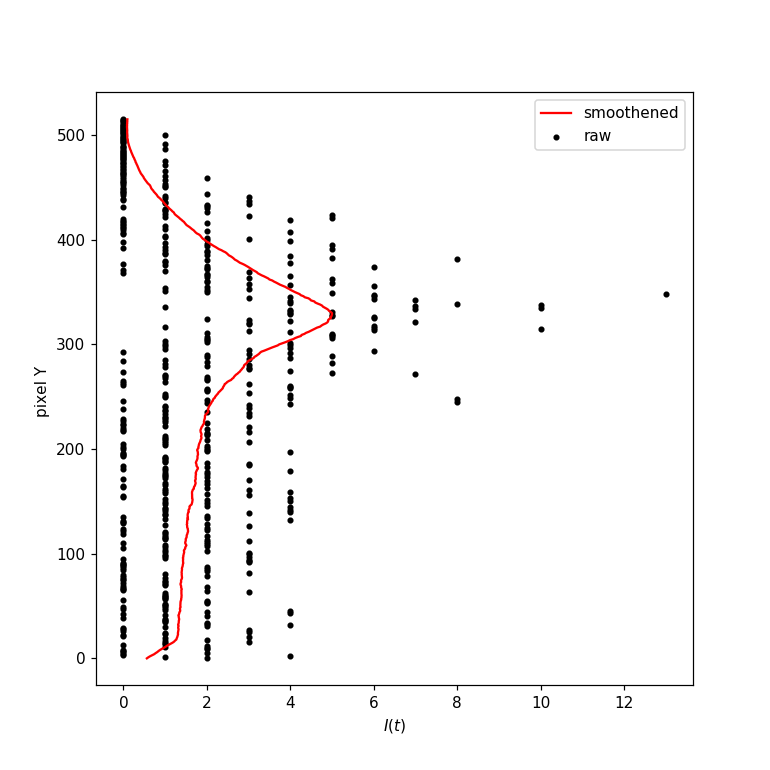

correction and Savitzky-golay smoothening time taken = 1.6486976146697998
39


<IPython.core.display.Javascript object>


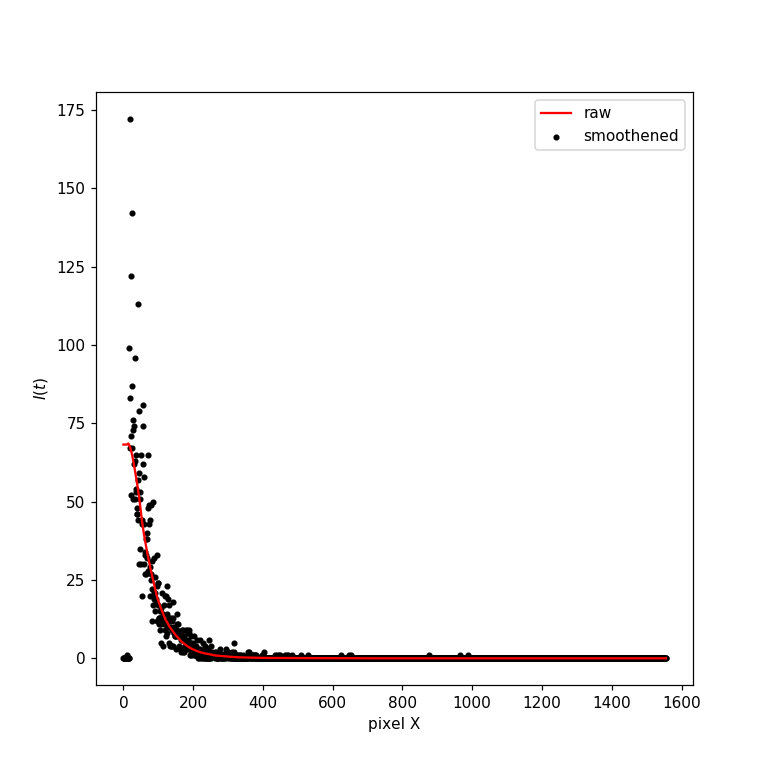

<IPython.core.display.Javascript object>


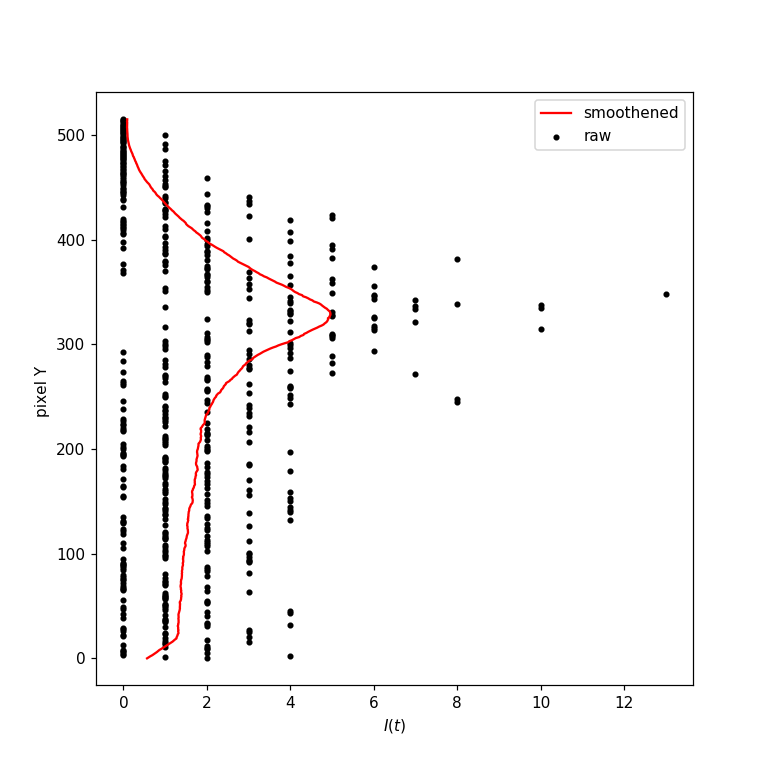

correction and Savitzky-golay smoothening time taken = 1.5859999656677246
41


<IPython.core.display.Javascript object>


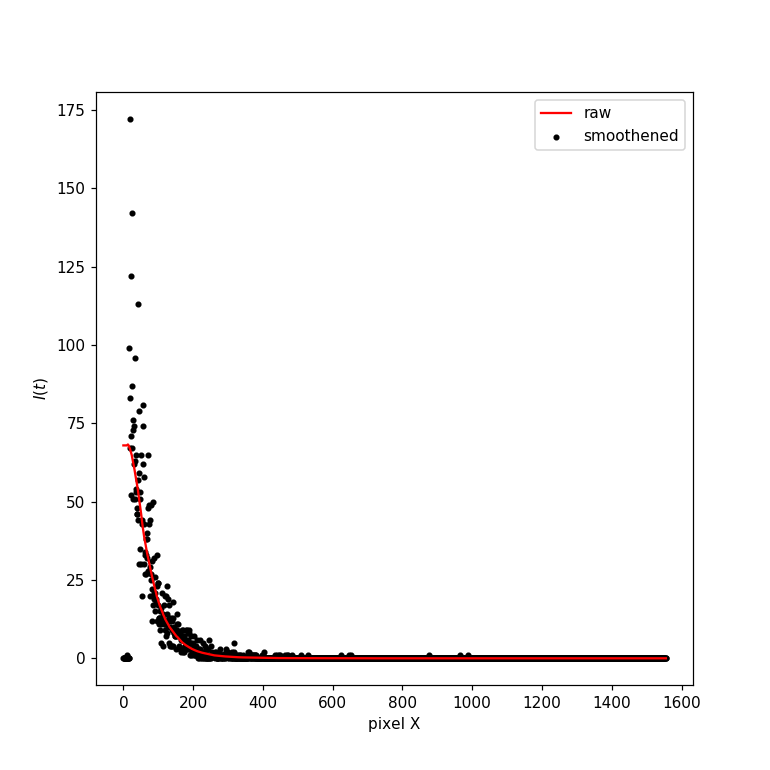

<IPython.core.display.Javascript object>


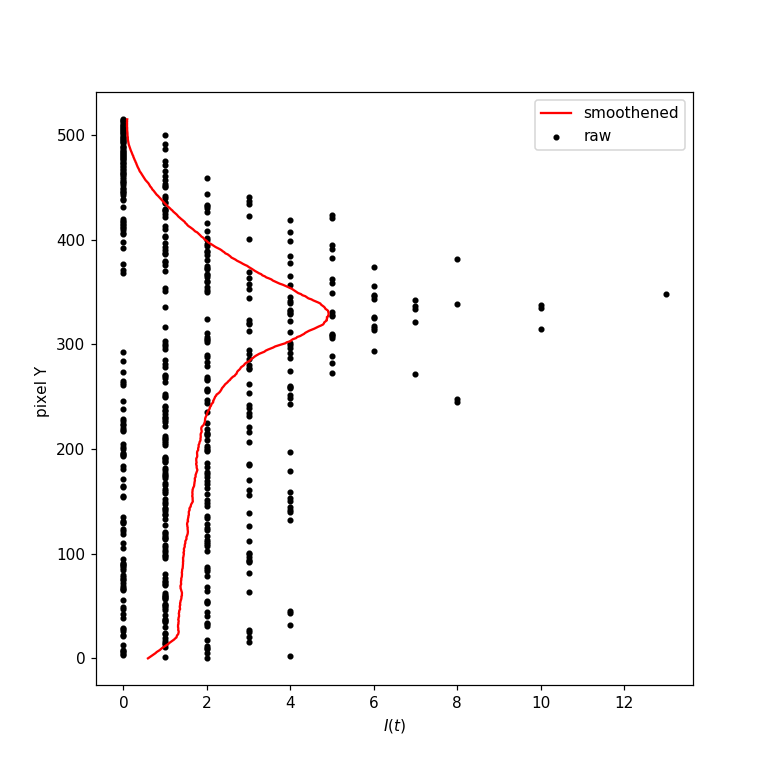

In [17]:
"""
Find the right smoothening box size and polynomial order

This code will smoothen a select frame at different box sizes in "listtolook1" with your chosen
Polynomial_order. And Plot out 

"""
listtolook1 = [11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41] #box sizes for smoothening
chi_square = []
p_value = []
for i in tqdm(range(len(listtolook1))):
    ################################################
    ################user input start################
    ################################################
    #define which frame you want to look at
    Zn = DD.FD.rdframe(1100)
    polynomial_order = 1
    
    #define below where you want to slice and see SG overlay on data
    slicexplane_yindex = 320
    sliceyplane_xindex = 172
    ################################################
    ################user input end  ################
    ################################################
    ta= time.time()
    Zf = correct_andSG( Zn, window_size=listtolook1[i], order=polynomial_order)
    tb= time.time()
    print('correction and Savitzky-golay smoothening time taken = {0}'.format(tb-ta))
    print(listtolook1[i])

    #slice through X
    plt.figure(figsize=(7,7))
    pixelinfo = np.arange(0,len(Zf[slicexplane_yindex,:]))
    plt.scatter(pixelinfo, Zn[slicexplane_yindex,:], color = 'black', marker = '.', label='smoothened') #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds
    plt.plot(pixelinfo,Zf[slicexplane_yindex,:], color = 'red', label='raw') #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds

    plt.ylabel(r'$I(t)$')
    plt.xlabel(r'pixel X')
    plt.legend(loc='best')

    plt.show()

    #slice through X

    plt.figure(figsize=(7,7))
    pixelinfo = np.arange(0,len(Zf[:,sliceyplane_xindex]))
    plt.scatter(Zn[:,sliceyplane_xindex],pixelinfo, color = 'black', marker = '.', label='raw') #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds
    plt.plot(Zf[:,sliceyplane_xindex],pixelinfo, color = 'red', label='smoothened') #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds

    plt.xlabel(r'$I(t)$')
    plt.ylabel(r'pixel Y ')
    plt.legend(loc='best')

    plt.show()
    chi_square.append(sp.stats.chisquare(Zn[:,sliceyplane_xindex], Zf[:,sliceyplane_xindex])[0])
    p_value.append(sp.stats.chisquare(Zn[:,sliceyplane_xindex], Zf[:,sliceyplane_xindex])[1])



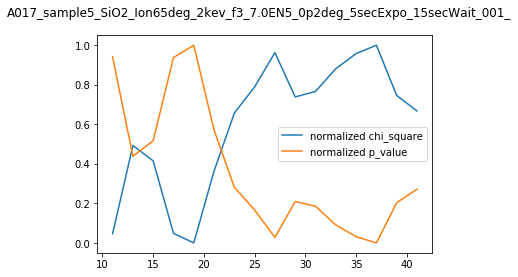

In [28]:
'''
show the p value and chi square values 
'''
plt.figure()
plt.plot(listtolook1[:],(chi_square-min(chi_square))/max(chi_square-min(chi_square)), label = 'normalized chi_square')
plt.plot(listtolook1,(p_value-min(p_value))/max(p_value-min(p_value)), label = 'normalized p_value')
plt.legend(loc='best')
plt.suptitle(np.str_(DD.DD['name']))
try:
    plt.savefig(np.str_(DD.DD['name'])[:40] + 'SummedIntensity_over_time')
except:
    pass
plt.show()

# Load static analysis functions in case you want to do some static analysis

## Start of Static Analysis

In [8]:
"""Load the functions to do Static Analysis"""
%run -i '/projectnb/ludwiggrp/Peco Myint/Static_analysis.py'
"""Look inside the Static_analysis.py file to see what funcations are available"""

'Look inside the Static_analysis.py file to see what funcations are available'

In [9]:
"""this file includes functions that plot and fit R when R values obtained from read_and_get_R_along_q_parallel 
You may store the extracted R values for later analysis. 
"""
%run -i '/projectnb/ludwiggrp/Peco Myint/Amplification_factors.py'

"""Look inside the Amplification_factors.py file to see what funcations are available"""

'Look inside the Amplification_factors.py file to see what funcations are available'

# Fit R vs q

In [26]:
#np.save('Rvalues',R)
R = np.load('Rvaluesmodified_PM20190203.npy')
R= R[5:-3]

plotandfit_R(R,200,400,200,700,10,30,80)
#plotRs(R,200,400,30,800,10,30,80)

FileNotFoundError: [Errno 2] No such file or directory: 'Rvaluesmodified_PM20190203.npy'

In [ ]:
"""
Plot your R fits 
"""
plt.figure(figsize=(8,7))
#plt.scatter(R[:,0], R[:,1]*1E3*0.1, color = 'black', marker = '.', label='data') 
params = [0.154654678, 3.04651325]
paramsOrchard = [0.23407739, 0.140664, 3.1151686]
#Re = np.arange(0.01,0.35,(R[:,0][1]-R[:,0][0]))
Re = np.arange(0.01,0.25,0.0105)


plt.plot(Re, Rwithorchard(Re, paramsOrchard[0], paramsOrchard[1],paramsOrchard[2] ),label='Orchard Term fit')
plt.plot(Re, long_wave_form(Re, params[0],params[1]),label=r'$S_{y}q^{2} - Bq^{4}$ fit') 
plt.ylabel(r'R($q_{y}$) ($s^{-1}$)')
plt.xlabel(r'q ($nm^{-1}$)')
plt.legend(loc='best')
plt.suptitle('A020_sample7_PreRippled_Si_Ion45deg_2kev_f3_7p0EN5_0p2deg_001_Rvsq theories fit'+' \n \n Sy, B = {0}'.format(params)+ 
                 ' Sy, A, h0 = {0}'.format(paramsOrchard), fontsize=8)

plt.show()

# End of Static Analysis

# G2 analysis

<IPython.core.display.Javascript object>


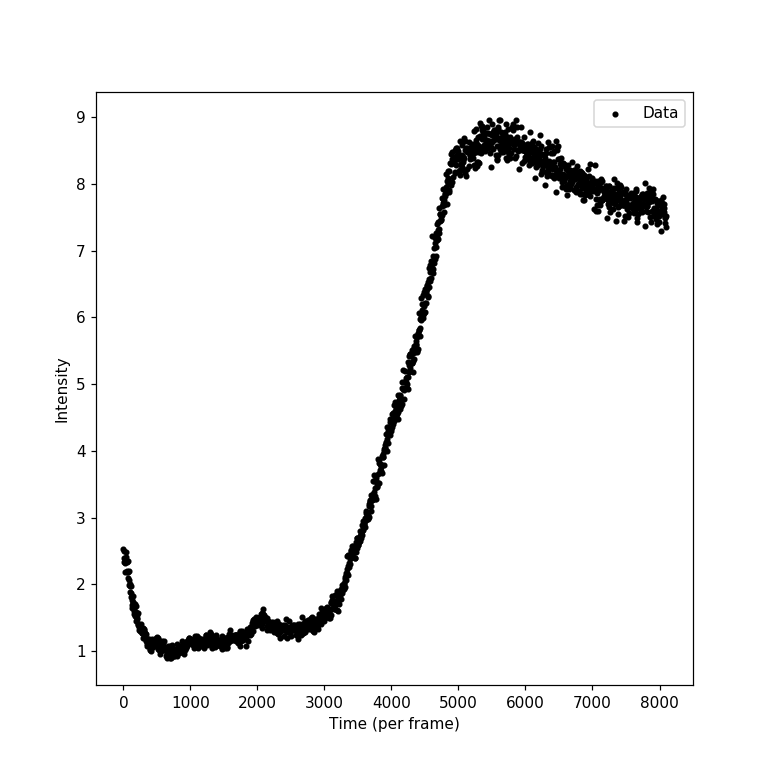

In [13]:
"""
plot before starting g2 analysis
"""
plot_intensity_for_pixel_box(get_intensity_for_pixel_box(320,340,150,170,200,DD.DD['numberfiles']))

# G2 function. Normalization by SG

/projectnb/ludwiggrp/Peco Myint/Amplification_factors.py:107: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.



smoothened avg I =53.51344678400459. time averaged I =53.32954648526078


<IPython.core.display.Javascript object>


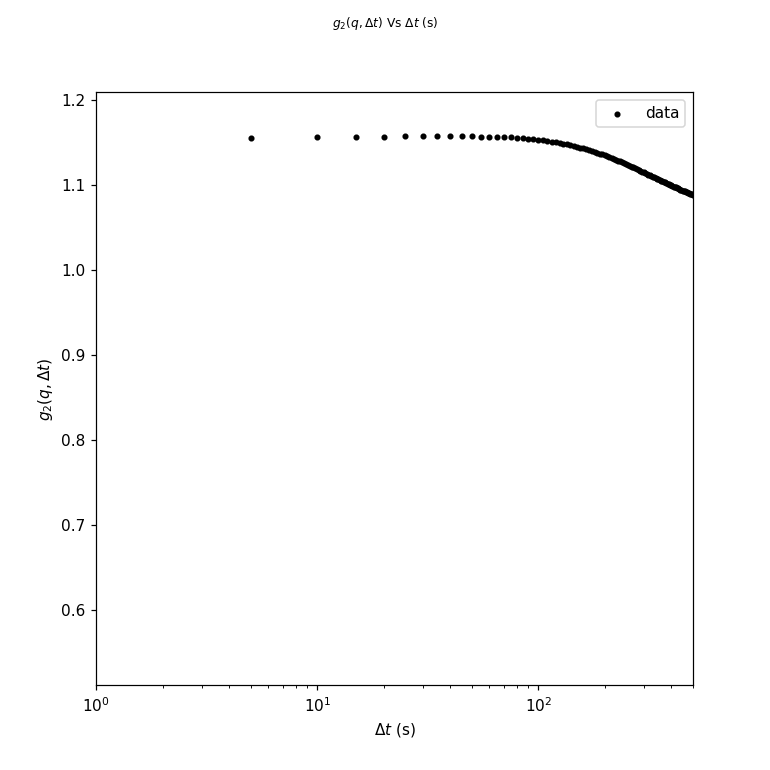

In [18]:
"""Peco's code
with both interpoloation and smoothening 
"""

def g2_with_SG(startframe, endframe, centery, centerx, boxsize):
    if boxsize//2 == 0:
        print('boxsize must be odd')
    else:
        halflength = np.int_((boxsize-1)/2)
    images = []
    g2 = []
    tau_val = []
    Itimeavg = np.zeros((boxsize,boxsize))
    Is_avg = np.zeros((boxsize,boxsize))
    for frame in tqdm(np.arange(startframe,endframe)):
        image = DD.FD.rdframe(frame)
        images.append(image)
        images_smooth = correct_andSG(image, window_size=boxsize, order=1)
        Is_avg += images_smooth[centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1]
        Itimeavg += image[centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1]
    N = len(images)
    Is_avgval = Is_avg/N
    Itimeavg = Itimeavg/N
    print('smoothened avg I ={0}'.format(np.average(Is_avgval)) + '. time averaged I ={0}'.format(np.average(Itimeavg)))
    for tau in tqdm(range(N)):
        Summation = np.zeros((boxsize,boxsize))
        for i in range(N-tau):
            Summation += images[i][centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1] * images[i+ tau][centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1]     
        g2s = (Summation/(N-tau))/(Is_avgval**2)
        g2.append(np.average(g2s))
        tau_val.append(tau) 
    #print(np.shape(Is_avgval),np.shape(Summation))
    return(np.asarray(tau_val)*datatakingtime, np.asarray(g2)) 

timeinfo, g2 = g2_with_SG(1000, 1500, 330, 60,21)

plt.figure(figsize=(7,7))
plt.scatter(timeinfo, g2, color = 'black', marker = '.', label='data') #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds
plt.ylabel(r'$g_{2}(q,\Delta t)$')
plt.xlabel(r'$\Delta t$ (s)')
plt.xscale('log')
plt.xlim(1,502)
#plt.ylim(1.05,1.11)
plt.legend(loc='best')
plt.suptitle(r'$g_{2}(q,\Delta t)$ Vs $\Delta t$ (s)', fontsize=8)

plt.show()


<IPython.core.display.Javascript object>


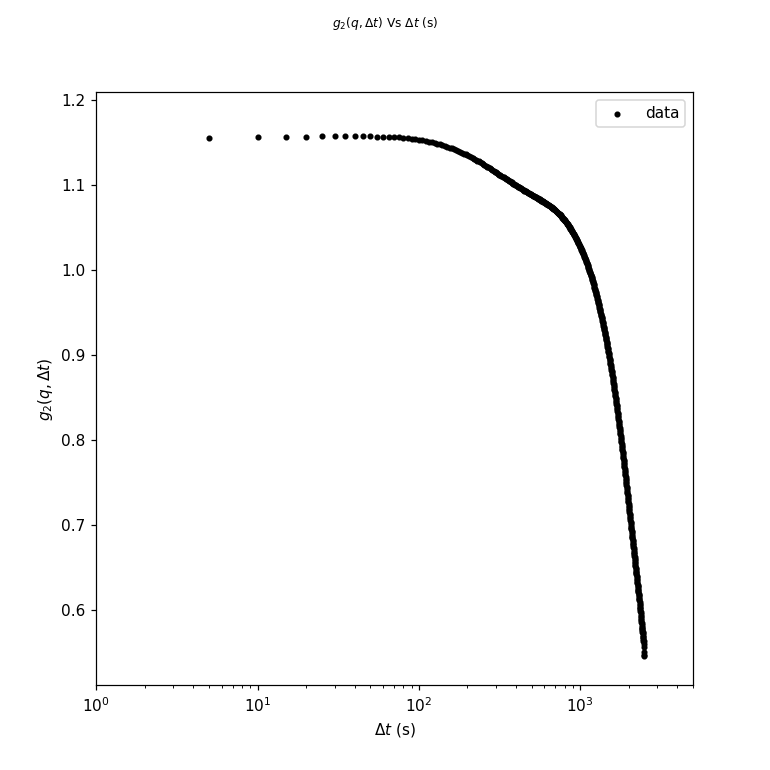

In [11]:
"""Peco's code
with plain SG smoothening

"""

def g2_with_SG(startframe, endframe, centery, centerx, boxsize):
    if boxsize//2 == 0:
        print('boxsize must be odd')
    else:
        halflength = np.int_((boxsize-1)/2)
    images = []
    g2 = []
    tau_val = []
    Itimeavg = np.zeros((boxsize,boxsize))
    Is_avg = np.zeros((boxsize,boxsize))
    for frame in tqdm(np.arange(startframe,endframe)):
        image = DD.FD.rdframe(frame)
        images.append(image)
#         images_smooth = sgolay2d(eliminate_module_beamstop(image)[1], window_size=boxsize, order=1) #interpolate and SG
        images_smooth = sgolay2d(image, window_size=boxsize, order=1) # just SG -- faster
        Is_avg += images_smooth[centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1]
        Itimeavg += image[centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1]
    N = len(images)
    Is_avgval = Is_avg/N
    Itimeavg = Itimeavg/N
    print('smoothened avg I ={0}'.format(np.average(Is_avgval)) + '. time averaged I ={0}'.format(np.average(Itimeavg)))
    for tau in tqdm(range(N)):
        Summation = np.zeros((boxsize,boxsize))
        for i in range(N-tau):
            Summation += images[i][centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1] * images[i+ tau][centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1]     
        g2s = (Summation/(N-tau))/(Is_avgval**2)
        g2.append(np.average(g2s))
        tau_val.append(tau) 
    #print(np.shape(Is_avgval),np.shape(Summation))
    return(np.asarray(tau_val)*datatakingtime, np.asarray(g2)) 

timeinfo, g2 = g2_with_SG(1000, 1500, 330, 60,21)

plt.figure(figsize=(7,7))
plt.scatter(timeinfo, g2, color = 'black', marker = '.', label='data') #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds
plt.ylabel(r'$g_{2}(q,\Delta t)$')
plt.xlabel(r'$\Delta t$ (s)')
plt.xscale('log')
plt.xlim(1,5000)
#plt.ylim(1.05,1.11)
plt.legend(loc='best')
plt.suptitle(r'$g_{2}(q,\Delta t)$ Vs $\Delta t$ (s)', fontsize=8)

plt.show()


smoothened avg I =53.5134467840046. time averaged I =53.32954648526078


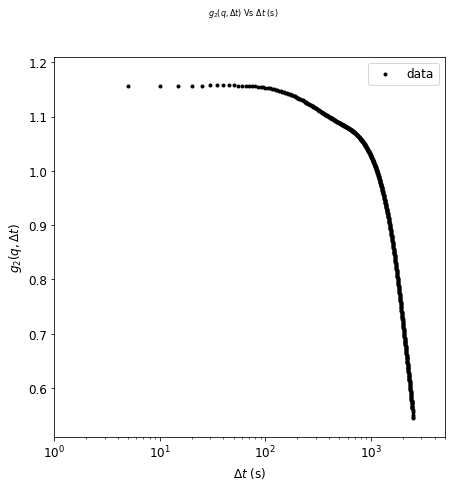

In [116]:
"""Peco's code
with plain SG smoothening

"""

def g2_with_SG(startframe, endframe, centery, centerx, boxsize):
    if boxsize//2 == 0:
        print('boxsize must be odd')
    else:
        halflength = np.int_((boxsize-1)/2)
    images = []
    g2 = []
    tau_val = []
    Itimeavg = np.zeros((boxsize,boxsize))
    Is_avg = np.zeros((boxsize,boxsize))
    for frame in tqdm(np.arange(startframe,endframe)):
        image = DD.FD.rdframe(frame)
        images.append(image)
#         images_smooth = sgolay2d(eliminate_module_beamstop(image)[1], window_size=boxsize, order=1) #interpolate and SG
        images_smooth = sgolay2d(image, window_size=boxsize, order=1) # just SG -- faster
        Is_avg += images_smooth[centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1]
        Itimeavg += image[centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1]
    N = len(images)
    Is_avgval = Is_avg/N
    Itimeavg = Itimeavg/N
    print('smoothened avg I ={0}'.format(np.average(Is_avgval)) + '. time averaged I ={0}'.format(np.average(Itimeavg)))
    for tau in tqdm(range(N)):
        Summation = np.zeros((boxsize,boxsize))
        for i in range(N-tau):
            Summation += images[i][centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1] * images[i+ tau][centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1]     
        g2s = (Summation/(N-tau))/(Is_avgval**2)
        g2.append(np.average(g2s))
        tau_val.append(tau) 
    #print(np.shape(Is_avgval),np.shape(Summation))
    return(np.asarray(tau_val)*datatakingtime, np.asarray(g2)) 

timeinfo, g2 = g2_with_SG(1000, 1500, 330, 60,21)

plt.figure(figsize=(7,7))
plt.scatter(timeinfo, g2, color = 'black', marker = '.', label='data') #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds
plt.ylabel(r'$g_{2}(q,\Delta t)$')
plt.xlabel(r'$\Delta t$ (s)')
plt.xscale('log')
plt.xlim(1,5000)
#plt.ylim(1.05,1.11)
plt.legend(loc='best')
plt.suptitle(r'$g_{2}(q,\Delta t)$ Vs $\Delta t$ (s)', fontsize=8)

plt.show()

<IPython.core.display.Javascript object>


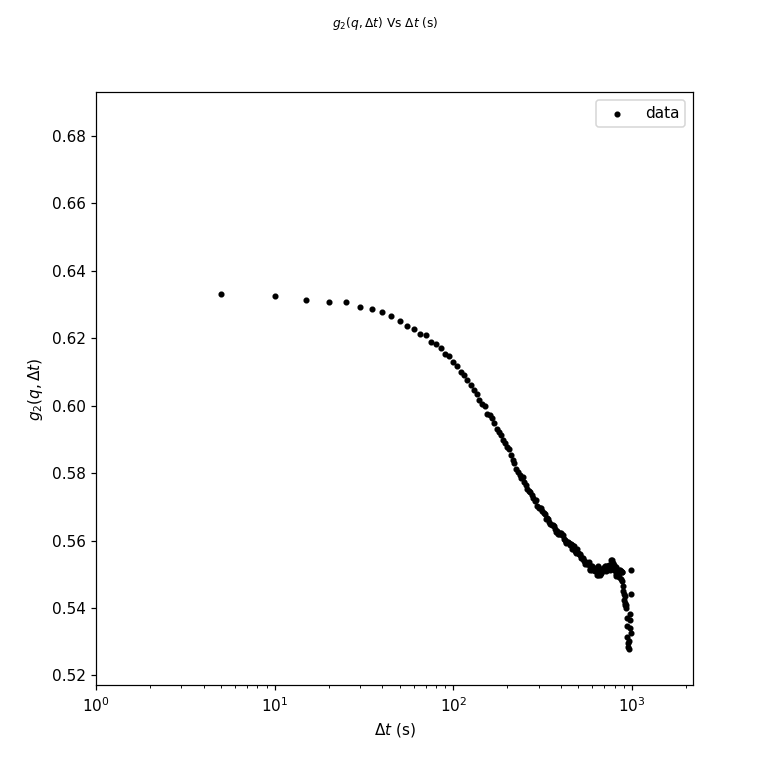

<IPython.core.display.Javascript object>


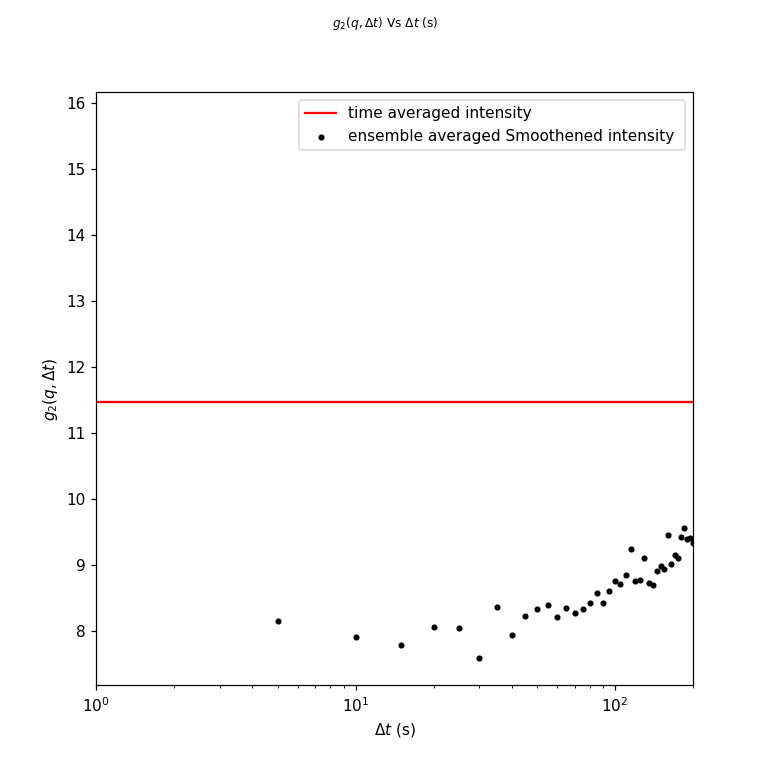

In [16]:
# """Peco's code -- doesn't work, written 20190215"""

# def g2_with_SG(startframe, endframe, centery, centerx, boxsize):
#     if boxsize//2 == 0:
#         print('boxsize must be odd')
#     else:
#         halflength = np.int_((boxsize-1)/2)
#     images = []
#     g2 = []
#     tau_val = []
#     Itimeavg = np.zeros((boxsize,boxsize))
#     Is_avg = []
#     for frame in tqdm(np.arange(startframe,endframe)):
#         image = DD.FD.rdframe(frame)
#         images.append(image)
#         images_smooth = sgolay2d(image, window_size=boxsize, order=1)
#         Is_avg.append(images_smooth[centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1])
#         Itimeavg += image[centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1]
#     N = len(images)
#     Itimeavg = Itimeavg/N
#     for tau in tqdm(range(N)):
#         Summation = np.zeros((boxsize,boxsize))
#         for i in range(N-tau):
#             Summation += (images[i][centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1] * images[i+ tau][centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1])/(Is_avg[-15])**2
#         g2s = (Summation/(N-tau))
#         g2.append(np.average(g2s))
#         tau_val.append(tau) 
#     #print(np.shape(Is_avgval),np.shape(Summation))
#     return(np.asarray(tau_val)*datatakingtime, np.asarray(g2), Itimeavg,Is_avg) 

# timeinfo, g2,Itimeavg,Is_avg= g2_with_SG(1000, 1200, 370, 105,11)

# plt.figure(figsize=(7,7))
# plt.scatter(timeinfo, g2, color = 'black', marker = '.', label='data') #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds
# plt.ylabel(r'$g_{2}(q,\Delta t)$')
# plt.xlabel(r'$\Delta t$ (s)')
# plt.xscale('log')
# plt.xlim(1,2200)
# plt.legend(loc='best')
# plt.suptitle(r'$g_{2}(q,\Delta t)$ Vs $\Delta t$ (s)', fontsize=8)

# plt.show()

# plt.figure(figsize=(7,7))
# Is = []
# for i in range(len(timeinfo)):
#     Is.append(np.average(Is_avg[i]))
# plt.scatter(timeinfo, np.asarray(Is), color = 'black', marker = '.', label='ensemble averaged Smoothened intensity ') 
# plt.plot(timeinfo, np.full(np.shape(timeinfo),np.average(Itimeavg)), color = 'red', label='time averaged intensity ') 

# plt.ylabel(r'$g_{2}(q,\Delta t)$')
# plt.xlabel(r'$\Delta t$ (s)')
# plt.xscale('log')
# plt.xlim(1,1000)
# plt.legend(loc='best')
# plt.suptitle(r'$g_{2}(q,\Delta t)$ Vs $\Delta t$ (s)', fontsize=8)
# plt.show()

<IPython.core.display.Javascript object>


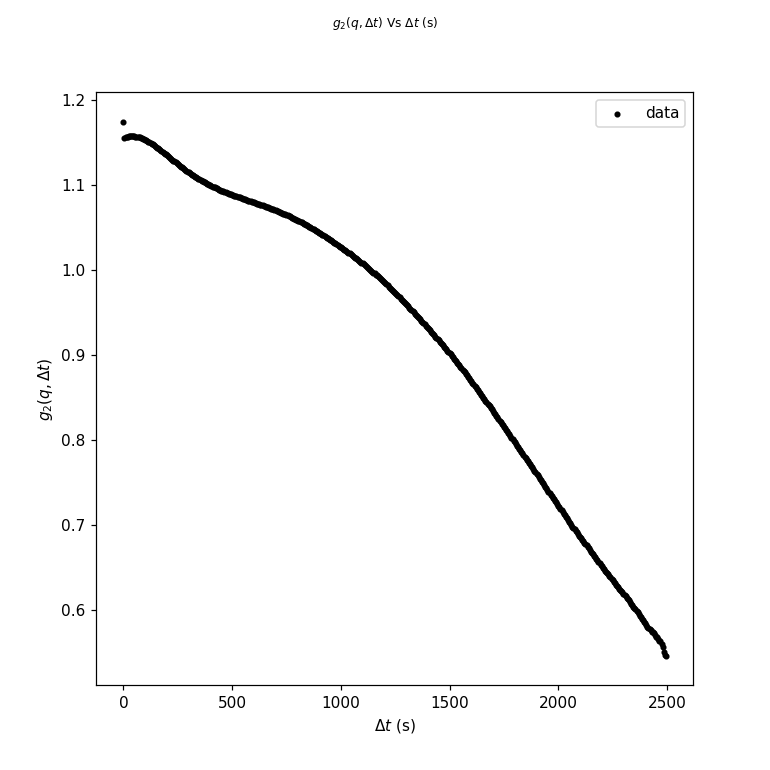

In [20]:
"""

Plot in a linear axis 

"""
plt.figure(figsize=(7,7))
plt.scatter(timeinfo, g2, color = 'black', marker = '.', label='data') #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds
plt.ylabel(r'$g_{2}(q,\Delta t)$')
plt.xlabel(r'$\Delta t$ (s)')
plt.legend(loc='best')
plt.suptitle(r'$g_{2}(q,\Delta t)$ Vs $\Delta t$ (s)', fontsize=8)

plt.show()

## Multi-taus Method

In [96]:
%run -i '/projectnb/ludwiggrp/Peco Myint/autocor.py'
%run -i '/projectnb/ludwiggrp/Peco Myint/partitions.py'


<Figure size 432x288 with 0 Axes>

In [37]:

pixellist=np.where(DD.mask.ravel()==1)[0] #list of valid pixels
#partition in bins using x,y (i,j) indices
yy,xx=np.unravel_index(pixellist,DD.mask.shape)
ylist=mkpartlist(np.arange(320,343,21)) # break points for bins in y
xlist=mkpartlist(np.arange(50,333,21)) # break points for bins in x
plist,bind,xbind,ybind,noperbin,inpixellist,binlist,binxlist,binylist=\
    partition2d(pixellist,xx,xlist,yy,ylist)
timeinfo1, g21= autocor(DD.FD,200,100,plist,bind,nobuf=8,nolev=8,skip=1,norm=1)
timeinfo1 = timeinfo1*datatakingtime
print(ylist, xlist, len(plist), bind)


/projectnb/ludwiggrp/Peco Myint/partitions.py:107: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  noperbin=np.bincount(bind)



[320. 341.] [ 50.  71.  71.  92.  92. 113. 113. 134. 134. 155. 155. 176. 176. 197.
 197. 218. 218. 239. 239. 260. 260. 281. 281. 302. 302. 323.] 5733 [ 0  0  0 ... 12 12 12]


In [32]:
np.int_(round((xlist[1*2]+xlist[1*2+1]-1)/2))+1

82

<IPython.core.display.Javascript object>


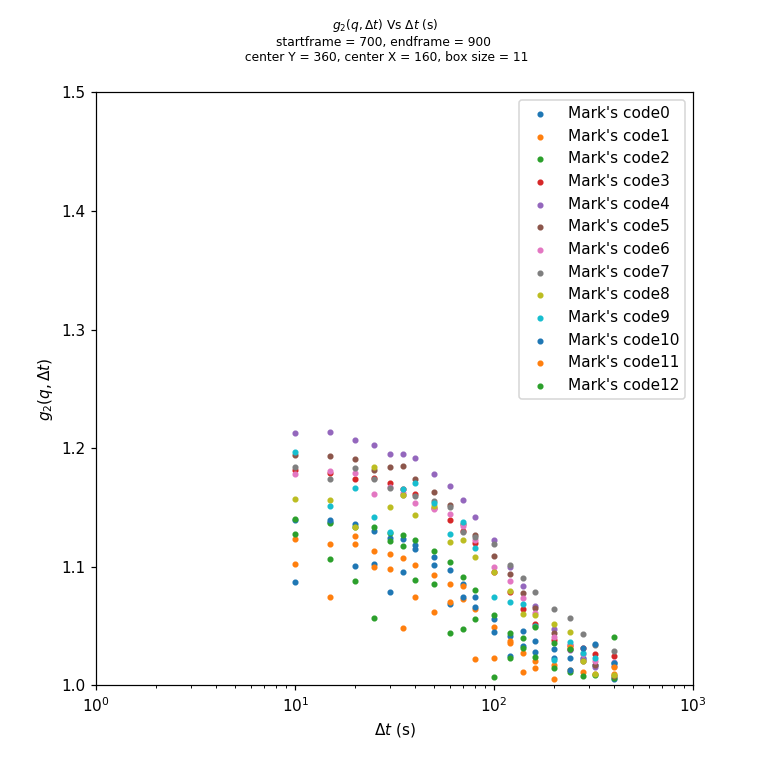

In [38]:
"""with interpolation"""
plt.figure(figsize=(7,7),frameon=True)
for i in range(np.shape(g21)[1]):
    plt.scatter(timeinfo1[2:], g21[:,i][2:], marker = '.', label="Mark's code" + np.str_(i)) #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds
#plt.scatter(timeinfo, g2, color = 'pink', marker = '.', label="Peco's code") #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds
plt.ylabel(r'$g_{2}(q,\Delta t)$')
plt.xlabel(r'$\Delta t$ (s)')
plt.xscale('log')
#plt.xlim(1,3000)
plt.xlim(1,1000)
plt.ylim(1.0,1.5)
plt.legend(loc='best')
plt.suptitle(r'$g_{2}(q,\Delta t)$ Vs $\Delta t$ (s)' + '\nstartframe = {0}'.format("700") + 
                 ', endframe = {0}'.format("900") + 
                 ' \n center Y = {0}'.format("360") + 
                 ', center X = {0}'.format("160") + 
                 ', box size = {0}'.format('11'), fontsize=8)

plt.show()

#plotandfit_g2(timeinfo, g2,700, 900, 360, 160)

<IPython.core.display.Javascript object>


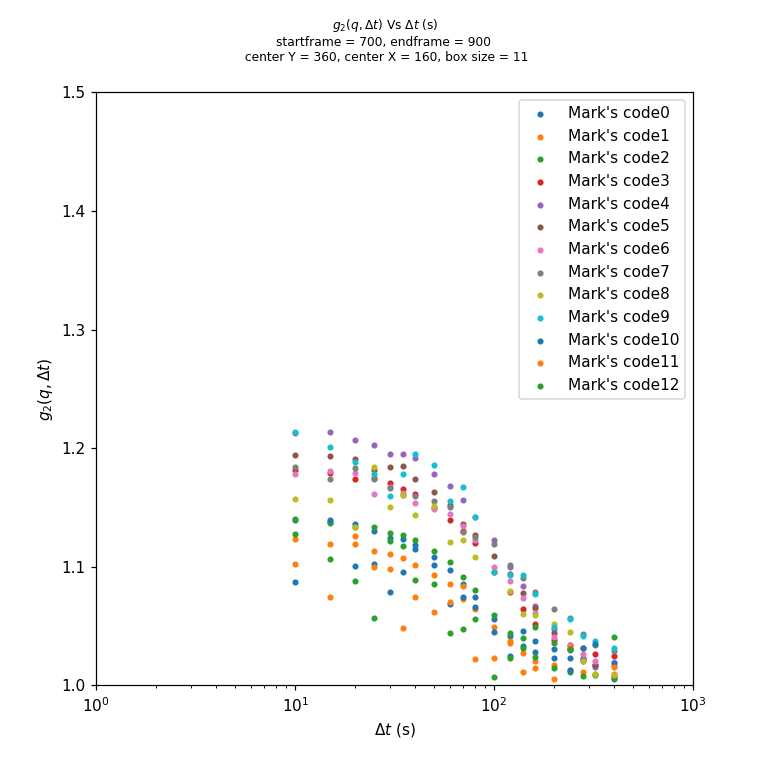

In [30]:
"""without interpolation"""

plt.figure(figsize=(7,7),frameon=True)
for i in range(np.shape(g21)[1]):
    plt.scatter(timeinfo1[2:], g21[:,i][2:], marker = '.', label="Mark's code" + np.str_(i)) #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds
#plt.scatter(timeinfo, g2, color = 'pink', marker = '.', label="Peco's code") #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds
plt.ylabel(r'$g_{2}(q,\Delta t)$')
plt.xlabel(r'$\Delta t$ (s)')
plt.xscale('log')
#plt.xlim(1,3000)
plt.xlim(1,1000)
plt.ylim(1.0,1.5)
plt.legend(loc='best')
plt.suptitle(r'$g_{2}(q,\Delta t)$ Vs $\Delta t$ (s)' + '\nstartframe = {0}'.format("700") + 
                 ', endframe = {0}'.format("900") + 
                 ' \n center Y = {0}'.format("360") + 
                 ', center X = {0}'.format("160") + 
                 ', box size = {0}'.format('11'), fontsize=8)

plt.show()

#plotandfit_g2(timeinfo, g2,700, 900, 360, 160)

In [85]:
def KWW(deltaT,beta,tau,n):
    """for a given q"""
    return 1+beta*np.exp(-2*((deltaT)/tau)**n)

def plotandfit_g2(timeinfo, g2,startframe, endframe, centery, centerx, boxsize):
    #Sy = 0
    params, params_covariance = optimize.curve_fit(KWW, timeinfo, g2)#, p0=[2,1.1,1.2]) 
    plt.figure(figsize=(8,8), frameon=True)
    plt.scatter(timeinfo, g2, color = 'black', marker = '.', label='data') 
    plt.plot(timeinfo, KWW(timeinfo, params[0],params[1],params[2]),label=r'$1 + \beta (q) e^{-2 (\frac{\Delta t}{\tau (q)})^{n(q)}}$ fit') 
#     observed_values= g2
#     expected_values = KWW(timeinfo, params[0],params[1],params[2])
#     test = sp.stats.chisquare(observed_values, f_exp=expected_values)
#     p_value = test[1]
#     chi_square = test[0]
    plt.ylabel(r'$g_{2}(q,\Delta t)$')
    plt.xlabel(r'$\Delta t$ (s)')
    plt.legend(loc='best')
    plt.suptitle('startframe = {0}'.format(startframe) + 
                 ' endframe = {0}'.format(endframe) + 
                 ' \n center Y = {0}'.format(centery) + 
                 ' center X = {0}'.format(centerx) + 
                 ' box size = {0}'.format(boxsize) +
                 '\n ' + r'$\beta (q)$ = {0}'.format(params[0]) 
                 + r', $\tau (q)$ = {0}'.format(params[1]) +
                 r', $n (q)$ = {0}'.format(params[2]) +
                 '\n q ={0}'.format(convert_pixel_to_q(centerx,centery,ccdx,ccdz,x0,y0,ccdx0,ccdz0,d,E,alpha_i)[1]), fontsize=10)
    plt.rcParams.update({'font.size': 14})
    plt.rcParams['axes.facecolor'] = 'white'
    plt.grid(False)
    plt.box(True)
    plt.xscale('log')
    plt.show()
#     plt.savefig(DD.DD['filename'][:-4]+'_start{0}'.format(startframe) + 
#                  '_end{0}'.format(endframe) + 
#                  '_Y{0}'.format(centery) +
#                  '_X{0}'.format(centerx) + 
#                  '_box{0}'.format(boxsize) +
#                  '_beta{0}'.format(params[0]) + 
#                 '_tau{0}'.format(params[1])  +
#                  '_n{0}'.format(params[2]) + '_KWW parameters_extracted')# '_q{0}'.format(convert_pixel_to_q(centerx,centery,ccdx,ccdz,x0,y0,ccdx0,ccdz0,d,E,alpha_i)[1]))

    
    
#     print(chi_square,p_value)
#plotandfit_g2(timeinfo[1:], g2[1:],700, 900, 360, 160,11)
# plt.figure(figsize=(7,7))
# plt.plot(np.linspace(1,50,50), KWW(np.linspace(1,50,50), 2,2.5,3.5,5),label=r'$1 + \beta (q) e^{-2 (\frac{\Delta t}{\tau (q)})^{n(q)}}$ fit') 



# Extract $\beta$ $\tau$ $n$ 

In [122]:
def read_and_get_compressed_exponents_along_q_parallel(startframe, endframe, centery, centerxstart, centerxend, boxsize, tolerence):
    """
    make sure you run "read_and_plot_fit_intensity_pixel" first to make sure the fit is decent then run this
    
    also make sure to change p0 guess whenver appropriate so that the fitting converges
    
    tolerence below 0.01 is a good choice
    """
    loop = np.arange(centerxstart,centerxend,boxsize)
    Vals = np.zeros((len(loop),4))
    STD = np.zeros((len(loop),4))
    pos = 0
    for i in tqdm(loop):
        timeinfo, g2 = g2_with_SG(startframe, endframe, centery, i, boxsize)
        #######
        timeinfo, g2 = timeinfo[3:-30], g2[3:-30] # dunno why the last thirty points are bad.. my g2 calculation code is not right ?
#         try:
        plotandfit_g2(timeinfo, g2,startframe, endframe, centery, i, boxsize)
        params, params_covariance = optimize.curve_fit(KWW, timeinfo, g2, p0=[1.1,1.1,1.2])
        observed_values= g2
        expected_values = KWW(timeinfo, params[0],params[1],params[2])
        test = sp.stats.chisquare(observed_values, f_exp=expected_values)
        p_value = test[1]
        chi_square = test[0]
        print(chi_square,p_value)
        if chi_square < tolerence:
            Vals[pos,3] = params[2]
            Vals[pos,2] = params[1]
            Vals[pos,1] = params[0]
            Vals[pos,0] = convert_pixel_to_q(i,centery,ccdx,ccdz,x0,y0,ccdx0,ccdz0,d,E,alpha_i)[1]#(i+(delx)/2) #extract q... select the center pixel of the box to calculate q

            STD[pos,3] = std_deviations[2]
            STD[pos,2] = std_deviations[1]
            STD[pos,1] = std_deviations[0]
            STD[pos,0] = convert_pixel_to_q(xcenter_val,ycenter_val,ccdx,ccdz,x0,y0,ccdx0,ccdz0,d,E,alpha_i)[1]#(i+(delx)/2) #extract q... select the center pixel of the box to calculate q
            pos +=  1
        else:
            Vals = np.delete(Vals,pos,0)
            STD = np.delete(STD,pos,0)
#         except:
#             pass
#             Vals = np.delete(Vals,pos,0)
#             STD = np.delete(STD,pos,0)
        
    return(Vals, STD)   



In [101]:
def read_and_get_compressed_exponents_along_q_parallel_Mark(startframe,numberofframes,plist,bind,tolerence,nobuf=8,nolev=8,skip=1,norm=1):
    """
    make sure you run "read_and_plot_fit_intensity_pixel" first to make sure the fit is decent then run this
    also make sure to change p0 guess whenver appropriate so that the fitting converges
    tolerence below 0.01 is a good choice
    """
    #loop = np.arange(centerxstart,centerxend,boxsize)
    Vals = np.zeros((max(bind)+1,4))
    STD = np.zeros((max(bind)+1,4))
    pos = 0
    timeinfo1, g21 = autocor(DD.FD,startframe,numberofframes,plist,bind,nobuf=8,nolev=8,skip=1,norm=1)
    timeinfo1 = timeinfo1*datatakingtime
    for i in tqdm(range(max(bind)+1)):
        xcenter_val = np.int_(round((xlist[i*2]+xlist[i*2+1]-1)/2))+1
        ycenter_val = np.int_(round((ylist[0*2]+xlist[0*2+1]-1)/2))+1
        #####
        timeinfo, g2 = timeinfo1[2:], g21[:,i][2:]
#         try:
        plotandfit_g2(timeinfo, g2,startframe, startframe+numberofframes, ycenter_val, xcenter_val, np.int_(xlist[i*2+1]-xlist[i*2]))
        params, params_covariance = optimize.curve_fit(KWW, timeinfo, g2)#, p0=[2,1.1,1.2]) 
        std_deviations = np.sqrt(np.diag(params_covariance))
        observed_values= g2
        expected_values = KWW(timeinfo, params[0],params[1],params[2])
        test = sp.stats.chisquare(observed_values, f_exp=expected_values)
        p_value = test[1]
#         print(timeinfo1.size())
        chi_square = test[0]
        print(chi_square,p_value)
        if chi_square < tolerence:
            Vals[pos,3] = params[2]
            Vals[pos,2] = params[1]
            Vals[pos,1] = params[0]
            Vals[pos,0] = convert_pixel_to_q(xcenter_val,ycenter_val,ccdx,ccdz,x0,y0,ccdx0,ccdz0,d,E,alpha_i)[1]#(i+(delx)/2) #extract q... select the center pixel of the box to calculate q
            
            STD[pos,3] = std_deviations[2]
            STD[pos,2] = std_deviations[1]
            STD[pos,1] = std_deviations[0]
            STD[pos,0] = convert_pixel_to_q(xcenter_val,ycenter_val,ccdx,ccdz,x0,y0,ccdx0,ccdz0,d,E,alpha_i)[1]#(i+(delx)/2) #extract q... select the center pixel of the box to calculate q
            pos +=  1
        else:
            Vals = np.delete(Vals,pos,0)
            STD = np.delete(STD,pos,0)
#         except:
#             pass
#             Vals = np.delete(Vals,pos,0)
#             STD = np.delete(STD,pos,0)
        
        
    return(Vals,STD)   


In [112]:
def plot_compressed_exponents(Vals, STD, startframe, endframe, centery, centerxstart, centerxend, boxsize):
    %matplotlib inline
    plt.figure(figsize=(8,8))
    plt.errorbar(Vals[:,0], Vals[:,1],yerr=STD[:,1], color='black', fmt='.k', ecolor='lightgray', elinewidth=1, capsize=3, label=r'$\beta (q)$')
    plt.ylabel(r'$\beta (q)$')
    plt.xlabel(r'q ($nm^{-1}$)')
    plt.legend(loc='best')
    plt.suptitle('center Y = {0}'.format(centery) +
                 ' \n centerxstart = {0}'.format(centerxstart) + 
                 ' centerxend = {0}'.format(centerxend) + 
                 ' box size = {0}'.format(boxsize) + 
                 ' \n startframe = {0}'.format(startframe) + 
                 ' endframe = {0}'.format(endframe), fontsize=8)
#     plt.rcParams.update({'font.size': 12}) 

    plt.show()
    #saving figures doesn't work with some versions of maplotlib .. use matplotlib==2.2.3
#     plt.savefig(DD.DD['filename'][:-4] +'_cenY{0}'.format(centery) +
#                  '_xstrt{0}'.format(centerxstart) + 
#                  '_xemd{0}'.format(centerxend) + 
#                  '_box size{0}'.format(boxsize) + 
#                  '_startframe{0}'.format(startframe) + 
#                  '_endframe{0}'.format(endframe) + '_beta_extracted')
    
    plt.figure(figsize=(8,8))
    plt.errorbar(Vals[:,0], Vals[:,2],yerr=STD[:,2], color = 'red', fmt='.k', ecolor='lightgray', elinewidth=1, capsize=3, label=r'$\tau (q)$')
    plt.ylabel(r'$\tau (q)$')
    plt.xlabel(r'q ($nm^{-1}$)')
    plt.legend(loc='best')
    plt.suptitle('center Y = {0}'.format(centery) +
                 ' \n centerxstart = {0}'.format(centerxstart) + 
                 ' centerxend = {0}'.format(centerxend) + 
                 ' box size = {0}'.format(boxsize) + 
                 ' \n startframe = {0}'.format(startframe) + 
                 ' endframe = {0}'.format(endframe), fontsize=8)

    plt.show()
#     plt.savefig(DD.DD['filename'][:-4] +'_cenY{0}'.format(centery) +
#                  '_xstrt{0}'.format(centerxstart) + 
#                  '_xemd{0}'.format(centerxend) + 
#                  '_box size{0}'.format(boxsize) + 
#                  '_startframe{0}'.format(startframe) + 
#                  '_endframe{0}'.format(endframe)+ '_tau_extracted')
    
    plt.figure(figsize=(8,8))
    plt.errorbar(Vals[:,0], Vals[:,3],yerr=STD[:,3], color = 'blue', fmt='.k', ecolor='lightgray', elinewidth=1, capsize=3, label=r'$n(q)$')
    plt.ylabel(r'$n(q)$')
    plt.xlabel(r'q ($nm^{-1}$)')
    plt.legend(loc='best')
    plt.suptitle('center Y = {0}'.format(centery) +
                 ' \n centerxstart = {0}'.format(centerxstart) + 
                 ' centerxend = {0}'.format(centerxend) + 
                 ' box size = {0}'.format(boxsize) + 
                 ' \n startframe = {0}'.format(startframe) + 
                 ' endframe = {0}'.format(endframe), fontsize=8)
    plt.rcParams.update({'font.size': 12})

    plt.show()
#     plt.savefig(DD.DD['filename'][:-4] +'_cenY{0}'.format(centery) +
#                  '_xstrt{0}'.format(centerxstart) + 
#                  '_xemd{0}'.format(centerxend) + 
#                  '_box size{0}'.format(boxsize) + 
#                  '_startframe{0}'.format(startframe) + 
#                  '_endframe{0}'.format(endframe)+ '_n_extracted')
    

## Extract the exponents different ways

# Using Multi Taus

/projectnb/ludwiggrp/Peco Myint/partitions.py:3: RuntimeWarning: overflow encountered in power
  def mkpartlist(lst,width=0):


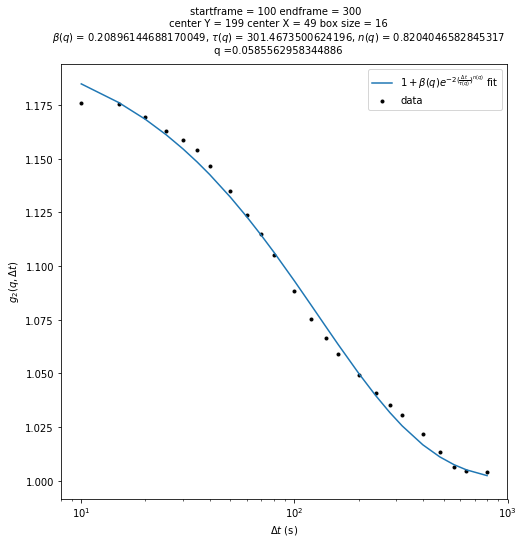

0.0003119779689344923 1.0


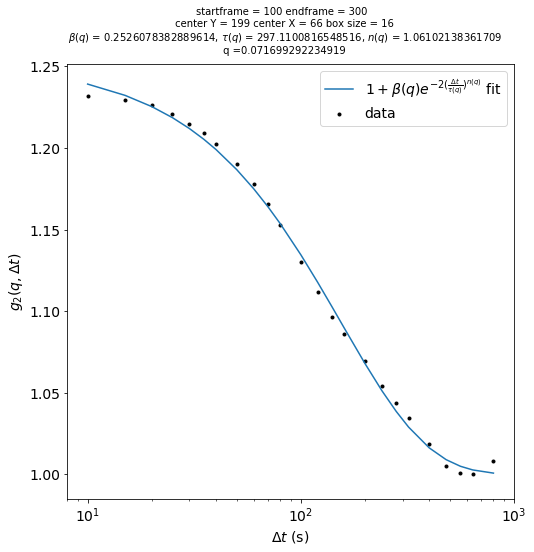

0.00036138876730106646 1.0


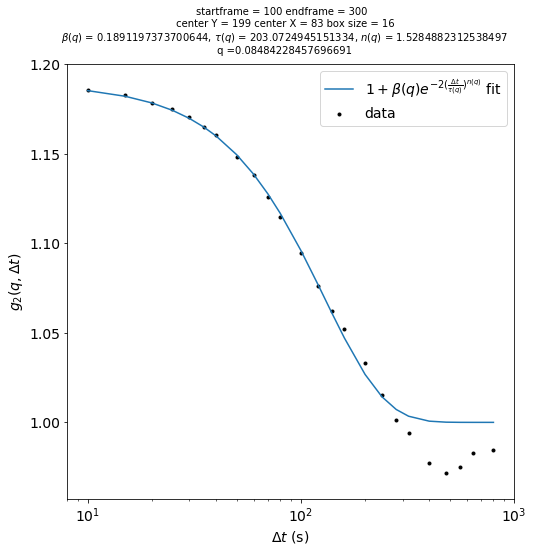

0.0027183782352861556 1.0


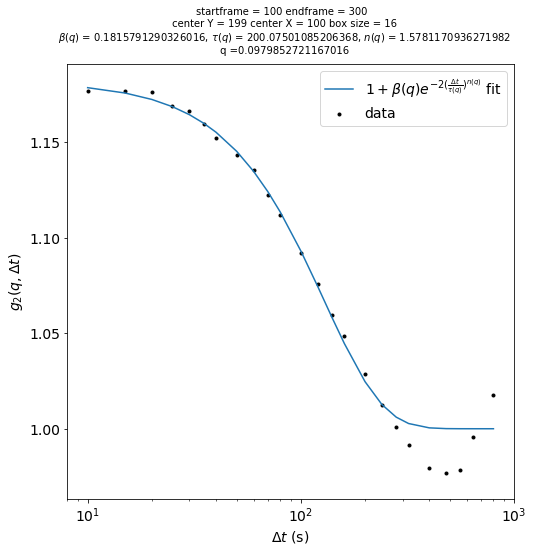

0.0019968815292401073 1.0


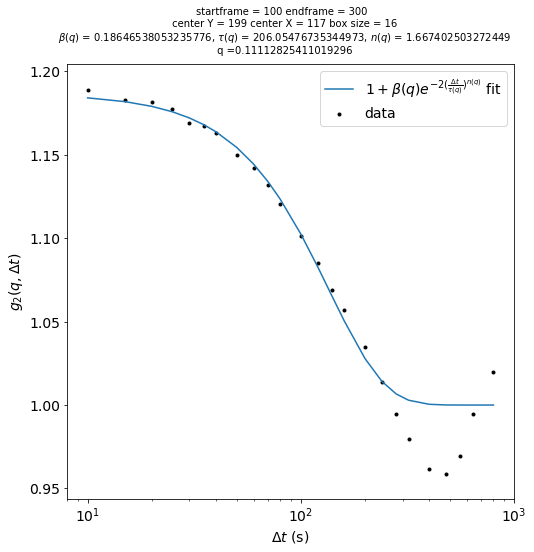

0.005441709224234332 1.0


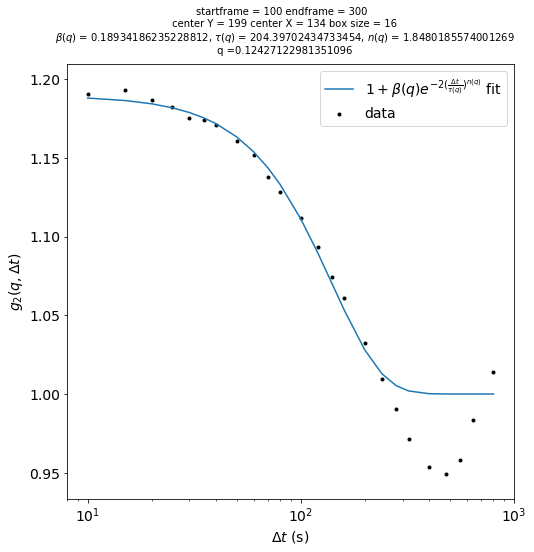

0.008381076562053828 1.0


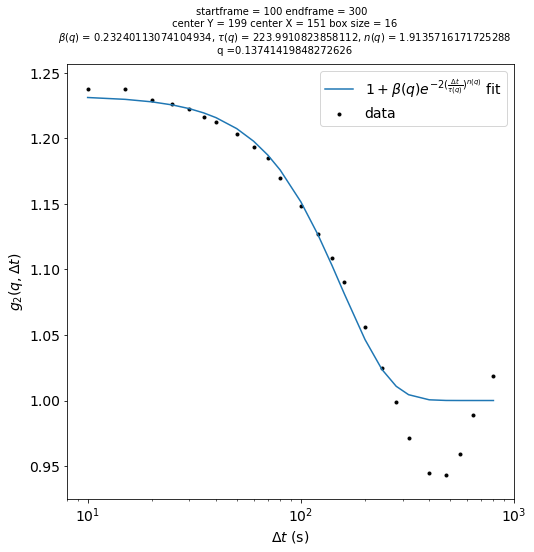

0.010115857177762217 1.0


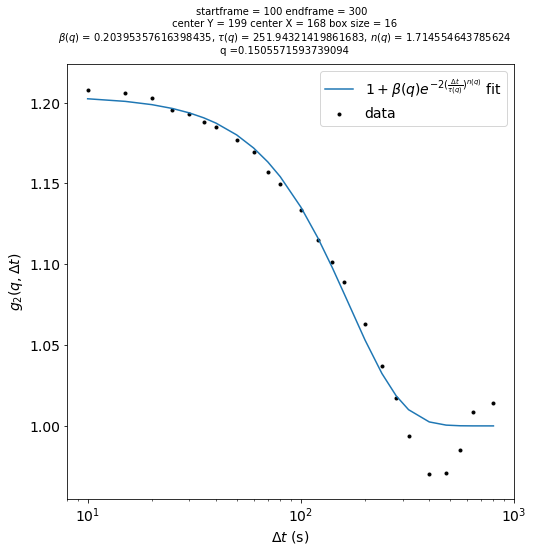

0.002973782605249892 1.0


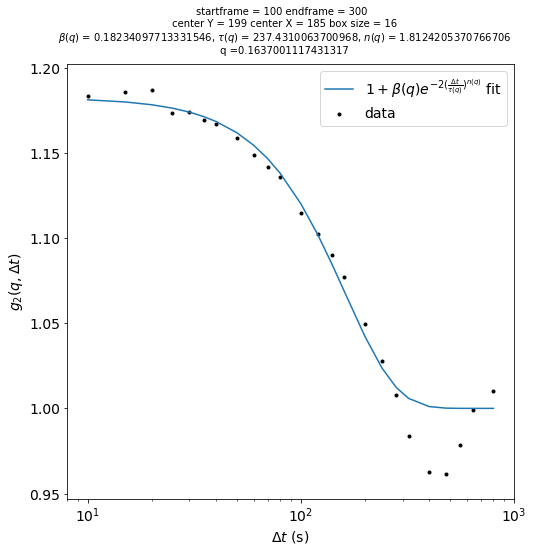

0.0043774326214876536 1.0


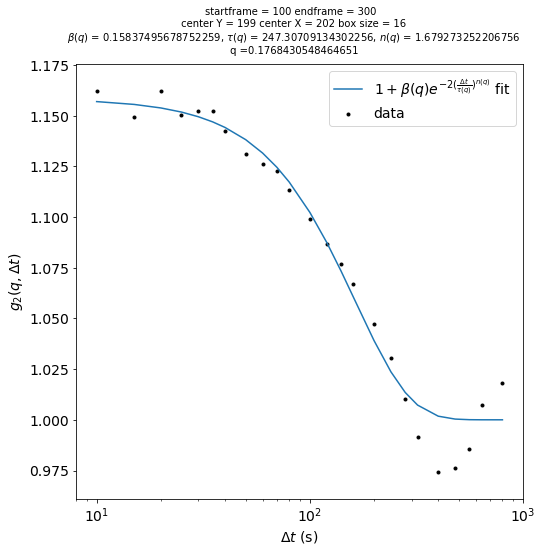

0.002585689348469443 1.0


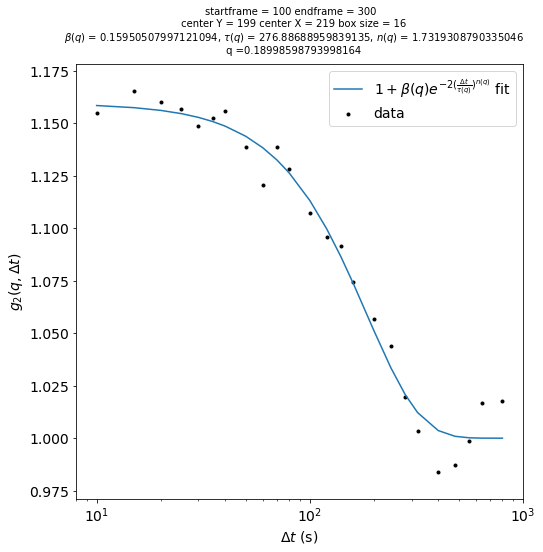

0.0019460354505535767 1.0


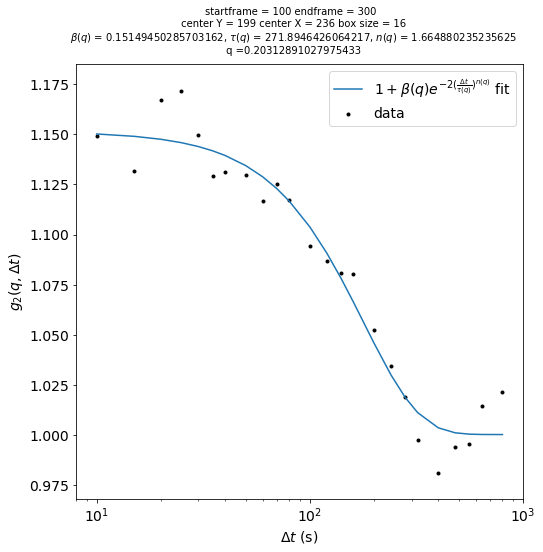

0.0033176997549845015 1.0


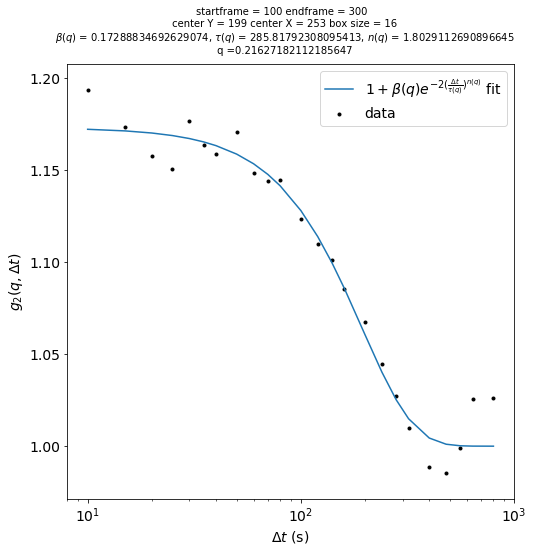

0.0030369949853810314 1.0


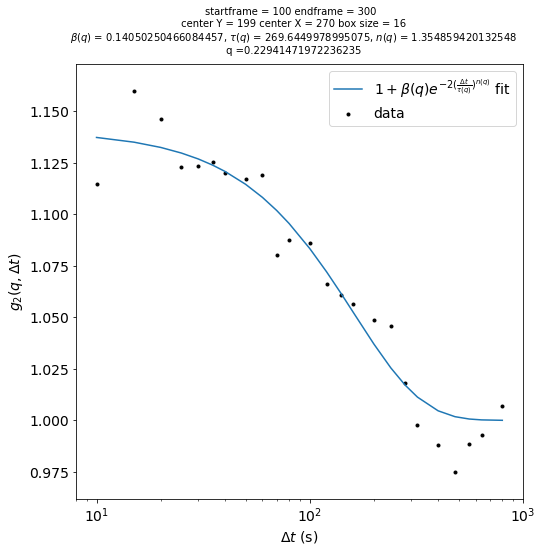

0.003842831631150758 1.0


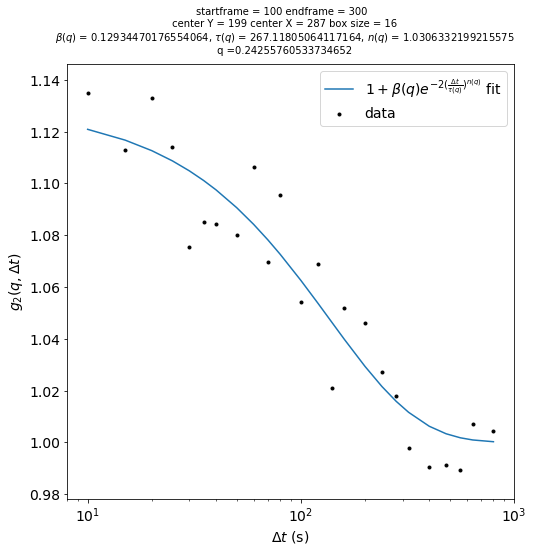

0.004984364227608026 1.0


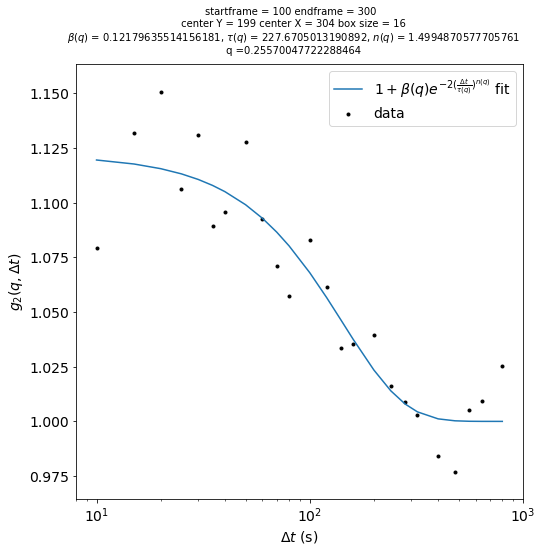

0.007265060747429671 1.0


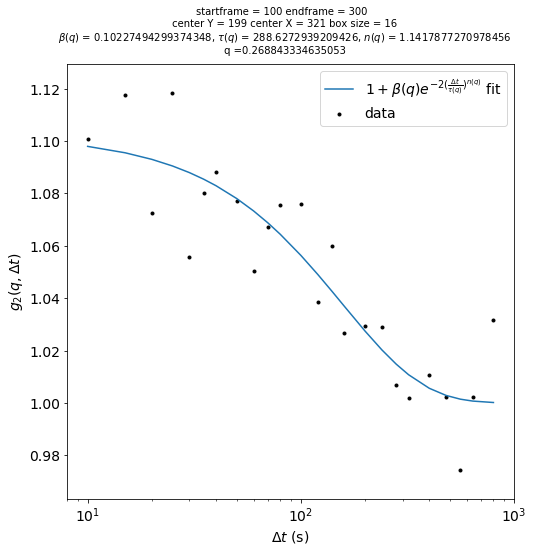

0.00601679531580158 1.0


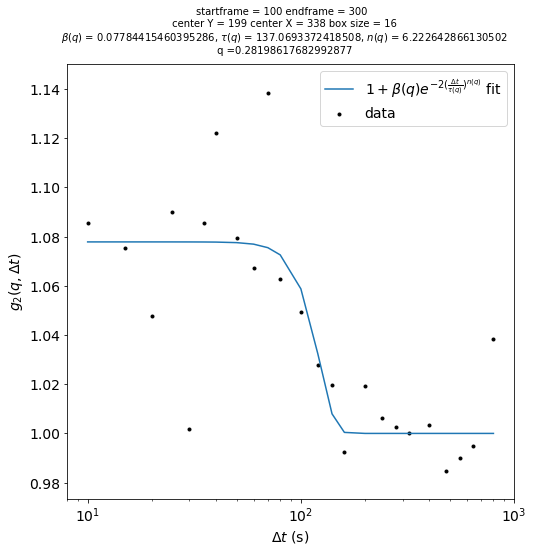

0.014714619010760342 1.0


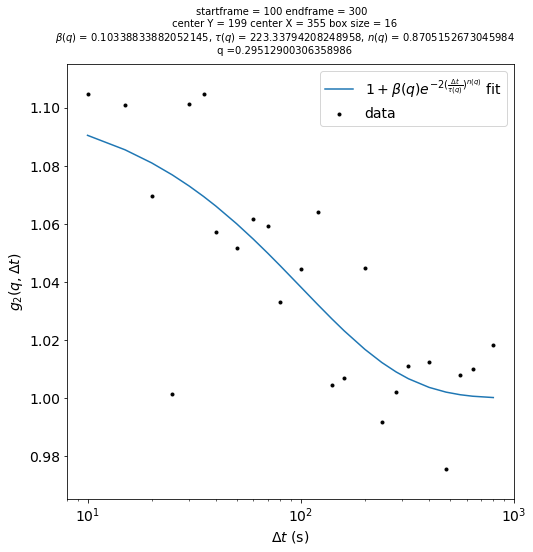

0.012384465485391528 1.0


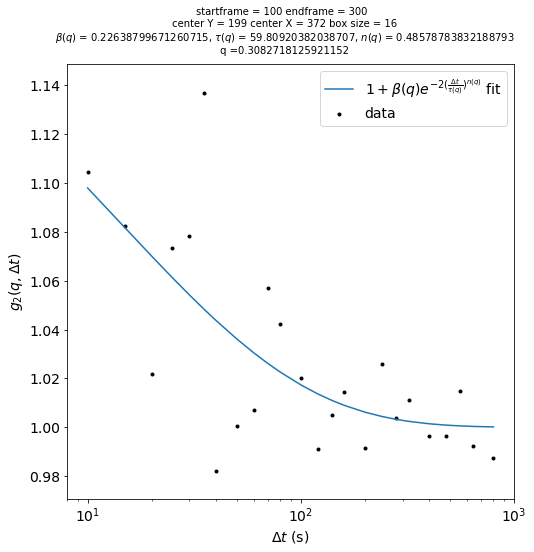

0.01883052373494645 1.0


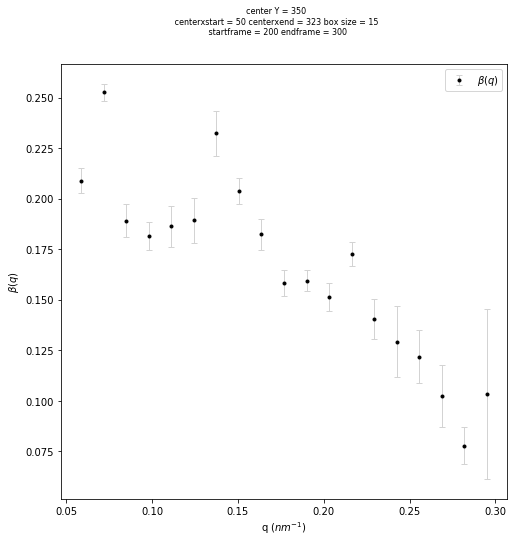

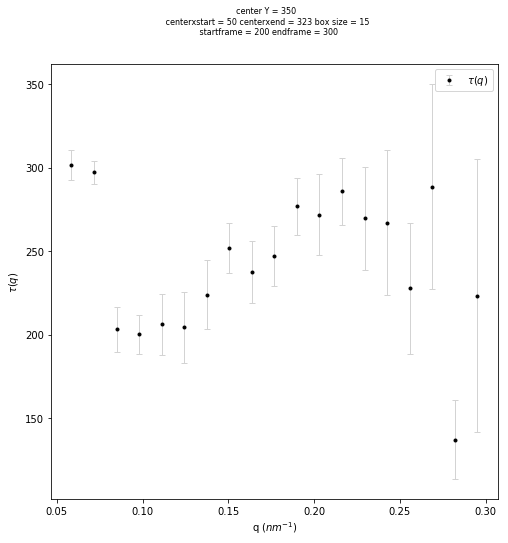

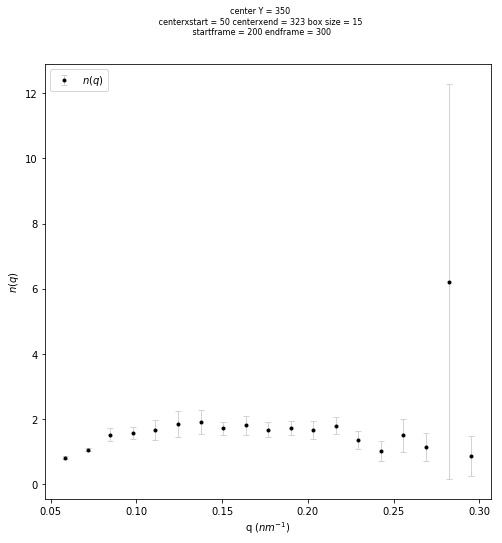

In [113]:
pixellist=np.where(DD.mask.ravel()==1)[0] #list of valid pixels
#partition in bins using x,y (i,j) indices
yy,xx=np.unravel_index(pixellist,DD.mask.shape)
ylist=mkpartlist(np.arange(340,373,17)) # break points for bins in y
xlist=mkpartlist(np.arange(40,390,17)) # break points for bins in x
plist,bind,xbind,ybind,noperbin,inpixellist,binlist,binxlist,binylist=\
    partition2d(pixellist,xx,xlist,yy,ylist)
Vals, STD = read_and_get_compressed_exponents_along_q_parallel_Mark(100, 200, plist,bind,0.015)
plot_compressed_exponents(Vals,STD, 200, 300, 350, 50, 323, 15)



# Without using Multi Taus -- doesn't work ... KWW won't fit.

smoothened avg I =3.1484741479407137. time averaged I =3.075289256198347


/share/pkg.7/anaconda3/5.2.0/install/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


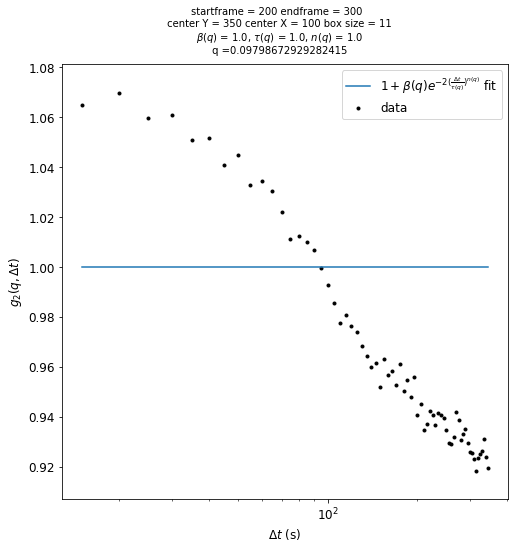

0.19558778728102366 1.0


smoothened avg I =2.998248070486988. time averaged I =3.072892561983471


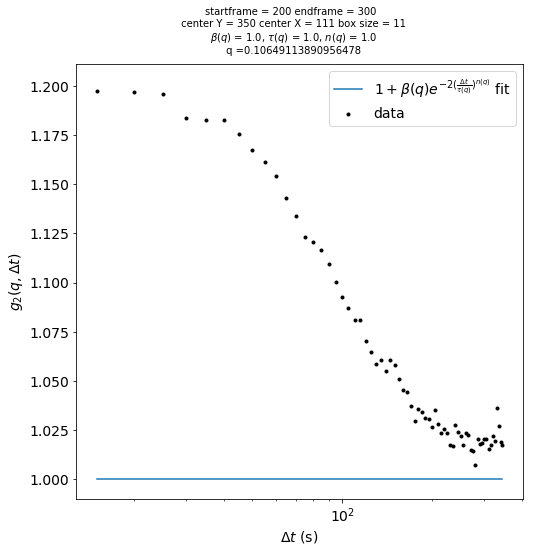

0.5121995164926025 1.0


smoothened avg I =2.49518407212622. time averaged I =2.4557851239669426


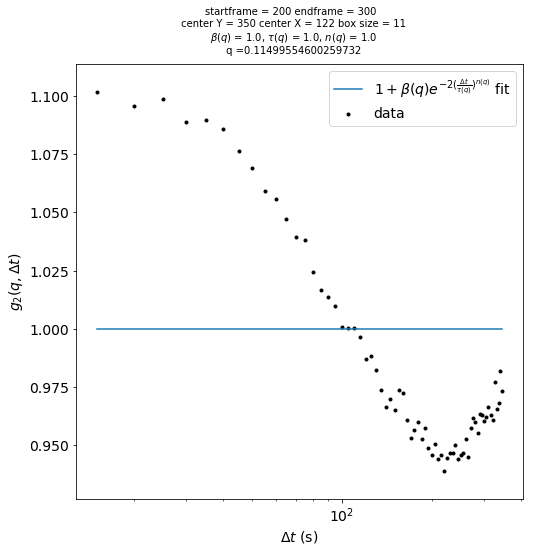

0.15696080638203475 1.0


smoothened avg I =2.2250269790314863. time averaged I =2.2279338842975207


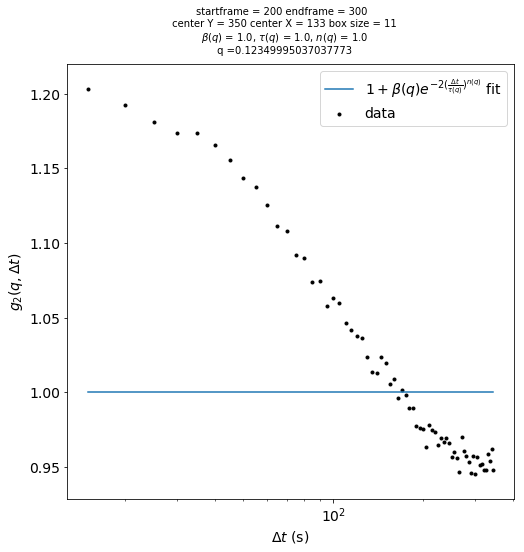

0.40260342587592013 1.0


smoothened avg I =1.884055050884502. time averaged I =1.9034710743801653


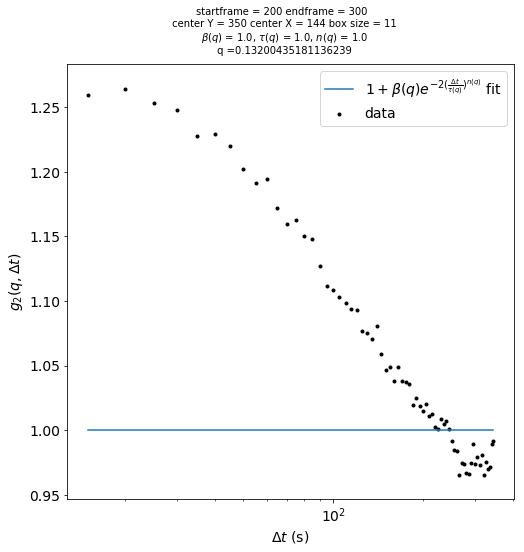

0.7893510195018341 1.0


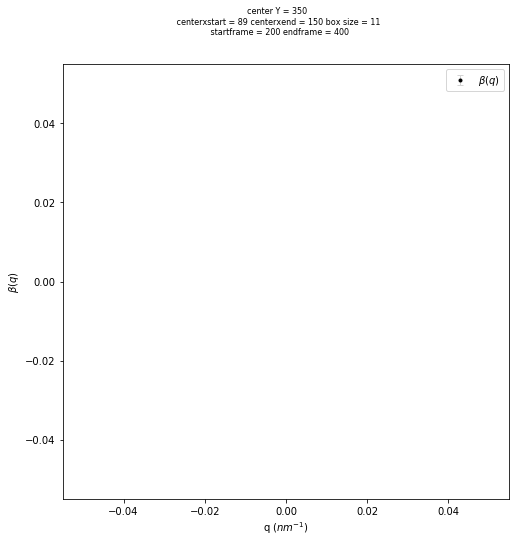

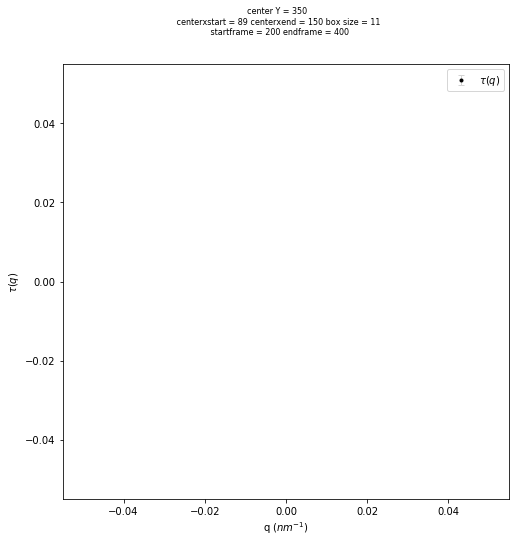

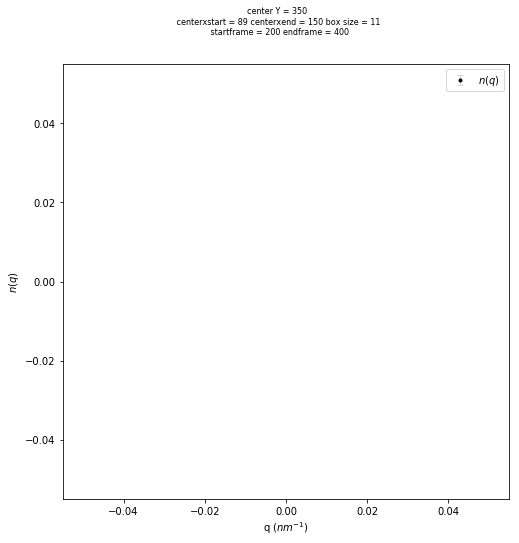

In [123]:
Vals, STD = read_and_get_compressed_exponents_along_q_parallel(200, 300, 350, 100, 150, 11,0.015)
plot_compressed_exponents(Vals, STD, 200, 400, 350, 89, 150, 11)

# Go through different data sets to plot g2 and extract data exponents 

In [42]:

listtolook = ['A007','A008','A009','A011','A012','A015','A017','A020','A022','A028','A031']

DD.DD={}

############################################################################################################
########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input start     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
############################################################################################################
"""
Edit the following if you want to look at a different data file
"""
DD.DD['Datalabel'] = listtolook[-1]
############################################################################################################
########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input end     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
############################################################################################################

"""
Load the data info. you will have to researt the Kernel if python can't find 
the following file. That means data file is loaded and Jupyter is looking
at a different directory now
"""
%run -i '/projectnb/ludwiggrp/Read_metadata.py'

#provode necessary values for data analysis
global ccdx, ccdz, x0, y0, ccdx0, ccdz0, d, E, alpha_i, datatakingtime
#ccd positions during data acquisition
ccdx=DD.DD['ccdx']
ccdz=DD.DD['ccdz']

#incident beam info
x0 = DD.DD['x0'] 
y0 = DD.DD['y0'] 
ccdx0=DD.DD['ccdx0']
ccdz0=DD.DD['ccdz0']

#the following are detector distance, Energy and incident angles
d=DD.DD['rr']
E=DD.DD['energy']*1.602*1E-16
alpha_i=DD.DD['nominal_angle']*(np.pi/180)

#time used to take a single frame
datatakingtime = DD.DD['preset']
    
    

total time: 0.006103515625


<IPython.core.display.Javascript object>


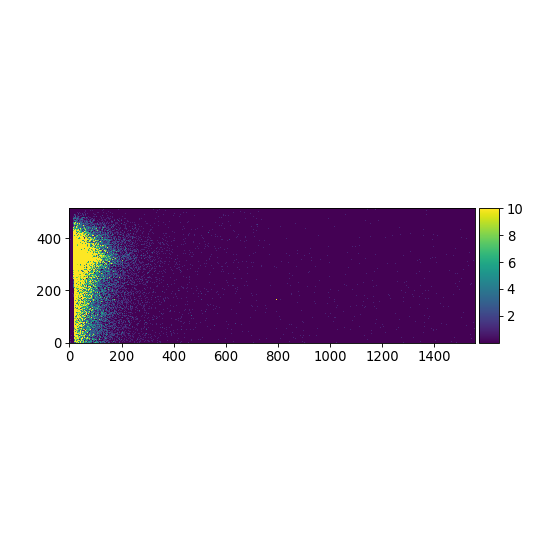

5


In [34]:
#Plot any frame
%matplotlib notebook
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.figure(figsize=(7,7))
ax = plt.gca()


im = imshow(DD.FD.rdframe(1000),vmin = 0.01, vmax=10)
plt.grid(False)


# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
#print(DD.FD.rdframe(3)[295:305,295:305])
print(datatakingtime)

<IPython.core.display.Javascript object>


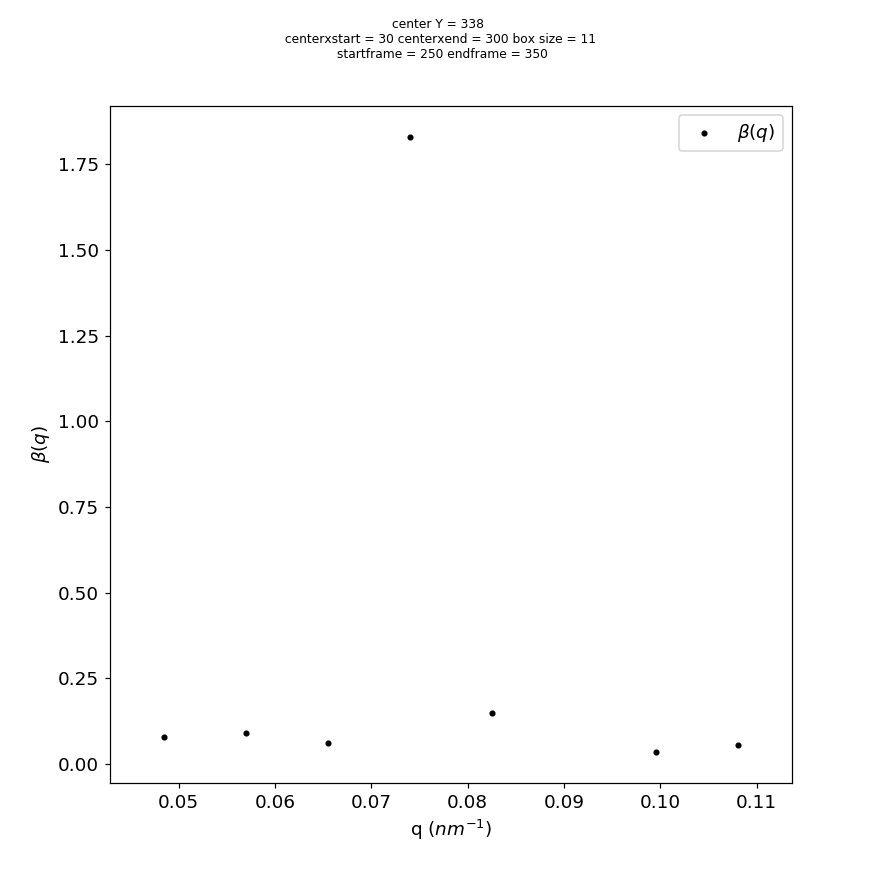

<IPython.core.display.Javascript object>


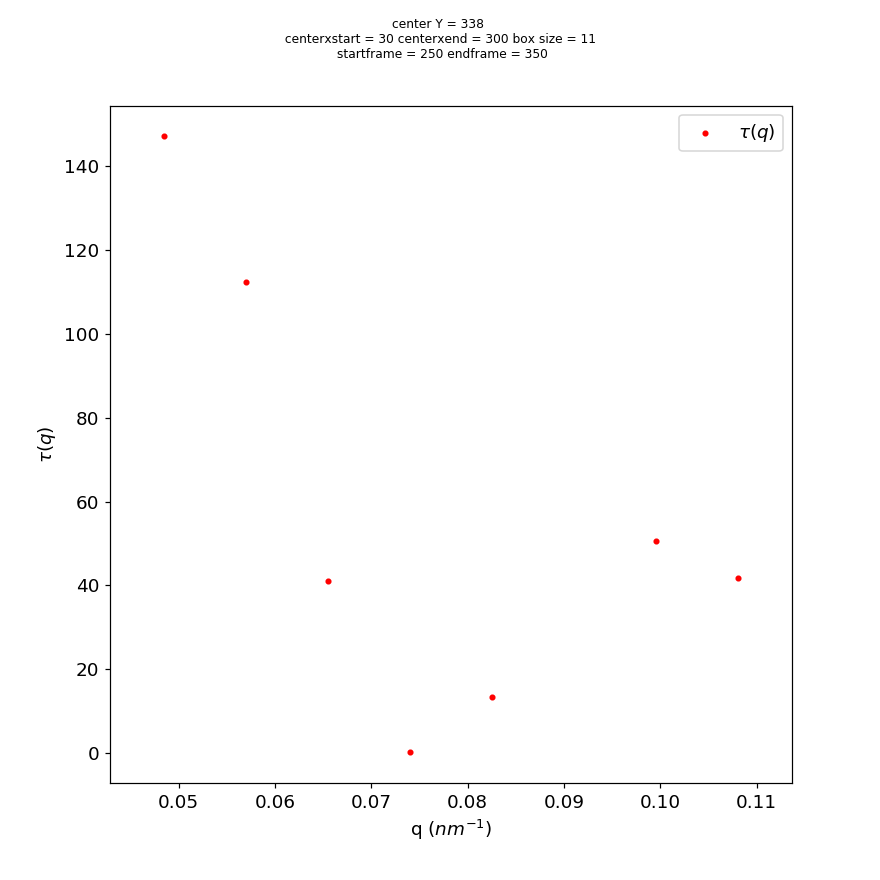

<IPython.core.display.Javascript object>


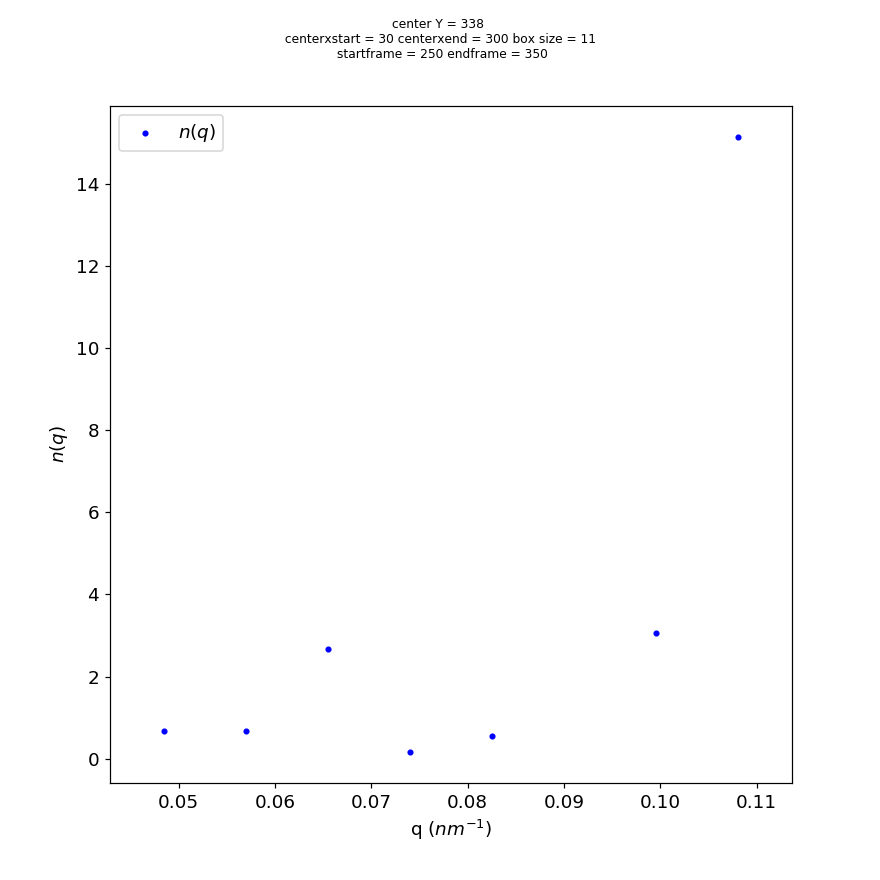

In [51]:
pixellist=np.where(DD.mask.ravel()==1)[0] #list of valid pixels
#partition in bins using x,y (i,j) indices
yy,xx=np.unravel_index(pixellist,DD.mask.shape)
ylist=mkpartlist(np.arange(338,358,11)) # break points for bins in y
xlist=mkpartlist(np.arange(30,300,11)) # break points for bins in x
plist,bind,xbind,ybind,noperbin,inpixellist,binlist,binxlist,binylist=\
    partition2d(pixellist,xx,xlist,yy,ylist)
#Vals = read_and_get_compressed_exponents_along_q_parallel_Mark(250,100, plist,bind, 0.03)
plot_compressed_exponents(Vals[:],250, 350, 338, 30, 300, 11)

# TTCF

/projectnb/ludwiggrp/Peco Myint/Interpolate_and_SG.py:18: RuntimeWarning: divide by zero encountered in true_divide
  # p(x,y) = a0 + a1*x + a2*y + a3*x^2 + a4*y^2 + a5*x*y + ...
/projectnb/ludwiggrp/Peco Myint/Interpolate_and_SG.py:18: RuntimeWarning: invalid value encountered in true_divide
  # p(x,y) = a0 + a1*x + a2*y + a3*x^2 + a4*y^2 + a5*x*y + ...


(1699, 101, 101) (1699, 1699)


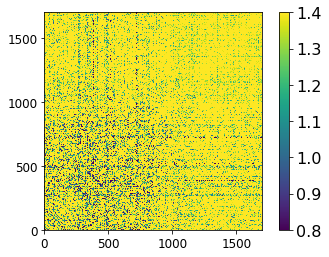

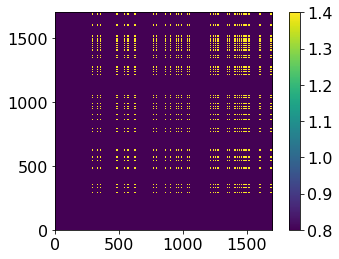

In [49]:
def TTCF(startframe,endframe, centerx, centery,boxsize):
    I = []
    Is = []
    if boxsize//2 == 0:
        print('boxsize must be odd')
    else:
        halflength = np.int_((boxsize-1)/2)
        
    for frame in tqdm(np.arange(startframe,endframe)):
        image = DD.FD.rdframe(frame) 
        imagesmooth = sgolay2d(image, window_size=31, order=1) # just SG -- faster
#         imagesmooth = correct_andSG(image, window_size=101, order=1)  # interpolate and SG
        I.append(image[centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1])
        Is.append(imagesmooth[centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1])
    Iarray = np.asarray(I)
    Isarray = np.asarray(Is)
    #Inormalized = (Iarray-np.average(Isarray))/np.average(Isarray)
    Inormalized = Iarray/ Isarray
    timetotal = endframe - startframe
    TTCF = np.zeros((timetotal,timetotal))
    TTCF2 = np.zeros((timetotal,timetotal))
#     for i in range(np.shape(Inormalized)[0]):
#         TTCF += np.outer(Inormalized[i], Inormalized[i])
    Inormalized_flat = Inormalized.ravel()
    for i in tqdm(range(np.shape(Inormalized)[1]**2)):
        I_vals = Inormalized_flat[np.int_(np.linspace(i+1,(np.shape(Inormalized)[0]-1)*(np.shape(Inormalized)[1]**2)+i+1,np.shape(Inormalized)[0])-1)]
        TTCF_temp = np.asarray(I_vals)
        TTCF += np.outer(TTCF_temp, TTCF_temp.T)
        if i == 2:
            TTCF2 = np.outer(TTCF_temp, TTCF_temp)
    TTCF = TTCF/(np.shape(Inormalized)[1]**2)
    return(Iarray, TTCF2, TTCF) 

a, b , processed = TTCF(1, 1700, 320, 51, 101)
print(np.shape(a),np.shape(b))
figure()
plt.imshow(processed, vmin = 0.8 , vmax = 1.4)
plt.rcParams.update({'font.size': 16})
#plt.imshow(processed)
plt.colorbar()

figure()
plt.imshow(b, vmin = 0.8 , vmax = 1.4)
#plt.imshow(b)
plt.colorbar()


In [ ]:
figure(figsize=(8,8))
#plt.imshow(processed)
plt.imshow(processed)
plt.grid(False)
plt.colorbar()

""""""

figure(figsize=(8,8))
processed1 = processed
for i in range(np.shape(processed)[0]):
    processed1[i,i] = processed1[i-1,i] 
plt.imshow(processed1, vmin = 0.9, vmax = 1.3)
plt.grid(False)
plt.colorbar()


""""""
flippeddata = np.flip(processed,0)
sliceoffset = 10


plt.figure(figsize=(8,8))
for i in np.linspace(6,0,1):
    i = np.int_(i)
    data = flippeddata.diagonal(offset = i*sliceoffset, axis1=1, axis2=0)
    plt.plot(np.arange(0,len(data))+i*(sliceoffset/2)-(np.shape(flippeddata)[1])/2,data, marker = '.', label= r'Offset from diagonal = {0}'.format(i*sliceoffset)) #multiplied by 0.1*1e3/1e3 which mean it is per 1000 seconds
plt.ylabel(r'$g_{2}(q,\Delta t)$')
plt.xlabel(r'$\Delta t$ (s)')
#plt.xscale('log')
#plt.xlim(1,1100)
plt.legend(loc='best')
plt.suptitle(r'$g_{2}(q,\Delta t)$ Vs $\Delta t$ (s)', fontsize=8)
plt.rcParams.update({'font.size':12})

plt.show()


# Go through data sets and generate TT plots along q parallels

In [ ]:
def TTCF(startframe,endframe, centerx, centery,boxsize):
        I = []
        Is = []
        if boxsize//2 == 0:
            print('boxsize must be odd')
        else:
            halflength = np.int_((boxsize-1)/2)

        for frame in tqdm(np.arange(startframe,endframe)):
            image = DD.FD.rdframe(frame) 
            imagesmooth = sgolay2d(image, window_size=41, order=1)
            I.append(image[centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1])
            Is.append(imagesmooth[centery-halflength:centery+halflength+1,centerx-halflength:centerx+halflength+1])
        Iarray = np.asarray(I)
        Isarray = np.asarray(Is)
        #Inormalized = (Iarray-np.average(Isarray))/np.average(Isarray)
        Inormalized = Iarray/ Isarray
        timetotal = endframe - startframe
        TTCF = np.zeros((timetotal,timetotal))
        TTCF2 = np.zeros((timetotal,timetotal))
    #     for i in range(np.shape(Inormalized)[0]):
    #         TTCF += np.outer(Inormalized[i], Inormalized[i])
        Inormalized_flat = Inormalized.ravel()
        for i in tqdm(range(np.shape(Inormalized)[1]**2)):
            I_vals = Inormalized_flat[np.int_(np.linspace(i+1,(np.shape(Inormalized)[0]-1)*(np.shape(Inormalized)[1]**2)+i+1,np.shape(Inormalized)[0])-1)]
            TTCF_temp = np.asarray(I_vals)
            TTCF += np.outer(TTCF_temp, TTCF_temp.T)
            if i == 2:
                TTCF2 = np.outer(TTCF_temp, TTCF_temp)
        TTCF = TTCF/(np.shape(Inormalized)[1]**2)
        return(Iarray, TTCF2, TTCF)
listtolook1 = ['A031']
for i in tqdm(range(len(listtolook1))):
    DD.DD={}

    ############################################################################################################
    ########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input start     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
    ############################################################################################################
    """
    Edit the following if you want to look at a different data file
    """
    DD.DD['Datalabel'] = listtolook[i]
    ############################################################################################################
    ########   xxxxxxxxxxxxxxxxxxxxxxxxxxxxx     Input end     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ############
    ############################################################################################################

    """
    Load the data info. you will have to researt the Kernel if python can't find 
    the following file. That means data file is loaded and Jupyter is looking
    at a different directory now
    """
    %run -i '/projectnb/ludwiggrp/Read_metadata.py'

    #provode necessary values for data analysis
    global ccdx, ccdz, x0, y0, ccdx0, ccdz0, d, E, alpha_i, datatakingtime
    #ccd positions during data acquisition
    ccdx=DD.DD['ccdx']
    ccdz=DD.DD['ccdz']

    #incident beam info
    x0 = DD.DD['x0'] 
    y0 = DD.DD['y0'] 
    ccdx0=DD.DD['ccdx0']
    ccdz0=DD.DD['ccdz0']

    #the following are detector distance, Energy and incident angles
    d=DD.DD['rr']
    E=DD.DD['energy']*1.602*1E-16
    alpha_i=DD.DD['nominal_angle']*(np.pi/180)

    #time used to take a single frame
    datatakingtime = DD.DD['preset']
    for i in tqdm(range(40,240,50)):
        startframe,endframe, centerx, centery,boxsize = 1, 400, 310, i, 71

        a, b , processed = TTCF(startframe,endframe, centerx, centery,boxsize)
        figure(figsize=(8,8))
        processed1 = processed
        for i in range(np.shape(processed)[0]):
            processed1[i,i] = processed1[i-1,i] 
        plt.imshow(processed1, vmin = 0.9, vmax = 1.3)
        plt.grid(False)
        plt.colorbar()
        np.save('TT_' +', '+np.str_(startframe)+ ', '+np.str_(endframe)+ ', ' +np.str_(centerx)+ ', ' +np.str_(centery)+ ', '+np.str_(boxsize),processed1)

        try:
            plt.savefig('TT_' + ', '+np.str_(startframe)+ ', '+np.str_(endframe)+ ', ' +np.str_(centerx)+ ', ' +np.str_(centery)+ ', '+np.str_(boxsize) )
        except:
            pass

# End of analysis

# Tests below

In [ ]:
test = np.linspace(1,10,10)
test = np.outer(test,test)
test1 = np.asarray([test, test+1, test+2, test+3])
test2 = test1.ravel()
print(test1)

print(len(test2))
length = 0
for i in range(np.shape(test1)[1]**2):
    print(test2[np.int_(np.linspace(i+1,(np.shape(test1)[0]-1)*(np.shape(test1)[1]**2)+i+1,np.shape(test1)[0])-1)])
    length +=1
print(length)

In [ ]:
#read_and_plot_fit_intensity_pixel(305,355,80,90,30,50) #305,355,100,140,10,30,55)
read_and_plot_fit_intensity_along_q_parallel(305,355,20,400,10,30,100)

In [ ]:
read_and_plot_fit_intensity_pixel(320,380,250,360,55,150)

In [ ]:
Ra=read_and_get_R_along_q_parallel(320,380,20,80,10,55,150,1)
Rb= read_and_get_R_along_q_parallel(320,380,80,120,10,55,130,1)
Rc=read_and_get_R_along_q_parallel(320,380,120,170,10,55,120,1)
Rd=read_and_get_R_along_q_parallel(320,380,170,260,10,55,100,1)
Re= read_and_get_R_along_q_parallel(320,380,260,310,10,55,90,-1)

Rmodified = stitch(stitch(stitch(stitch(Ra,Rb),Rc),Rd),Re)
np.save('Rvaluesmodified_PM20190203',Rmodified)
plotRs_manuallabel(Rmodified, '(320,380,20,80,10,55,150,1)'+
                   '\n(320,380,80,120,10,55,130,1)'+
                   '\n(320,380,120,170,10,55,120,1)'+
                   '\n(320,380,170,260,10,55,100,1)'+
                   '\n(320,380,260,310,10,55,90,-1)'+
                   '\n',11)
plotandfit_R(Rmodified,320,380,20,310,10,55,150)

In [5]:
""" test to understand SG"""
window_size = 5
order = 2

n_terms = ( order + 1 ) * ( order + 2)  / 2.0

half_size = window_size // 2

exps = [ (k-n, n) for k in range(order+1) for n in range(k+1) ]

# coordinates of points
ind = np.arange(-half_size, half_size+1, dtype=np.float64)
dx = np.repeat( ind, window_size )
dy = np.tile( ind, [window_size, 1]).reshape(window_size**2, )

# build matrix of system of equation
A = np.empty( (window_size**2, len(exps)) )
for i, exp in enumerate( exps ):
    A[:,i] = (dx**exp[0]) * (dy**exp[1])
    #print(A[:,i])
m = np.linalg.pinv(A)[0].reshape((window_size, -1))
print(m)

[[-0.07428571  0.01142857  0.04        0.01142857 -0.07428571]
 [ 0.01142857  0.09714286  0.12571429  0.09714286  0.01142857]
 [ 0.04        0.12571429  0.15428571  0.12571429  0.04      ]
 [ 0.01142857  0.09714286  0.12571429  0.09714286  0.01142857]
 [-0.07428571  0.01142857  0.04        0.01142857 -0.07428571]]


In [ ]:
array1 = [1, 6, 1, 1, 1, 2, 2] 
bin = np.bincount(array1,[0,0,0,1,1,0,0]) 
print("Bincount output  : \n ", bin) 

In [ ]:
plotRs_manuallabel(Rmodified[5:], '(320,380,20,80,10,55,150,1)'+
                   '\n(320,380,80,120,10,55,130,1)'+
                   '\n(320,380,120,170,10,55,120,1)'+
                   '\n(320,380,170,260,10,55,100,1)'+
                   '\n(320,380,260,310,10,55,90,-1)'+
                   '\n',11)
plotandfit_R(Rmodified[5:],320,380,20,310,10,55,150)
#plotandfit_R_constraint(Rmodified,320,380,20,310,10,55,150)

In [ ]:
#read_and_plot_fit_intensity_pixel(250,350,240,250,30,70)
#read_and_plot_fit_intensity_along_q_parallel(250,350,20,200,10,30,80)
#read_and_get_plot_R_along_q_parallel(305,355,20,170,10,30,45) #305,355,150,160,30,110
read_and_get_plot_R_along_q_parallel(305,355,150,180,10,30,40) # with R negative guess

In [ ]:
read_and_get_plot_R_along_q_parallel(200,400,440,700,10,30,80) #200 440

In [ ]:
read_and_get_plot_R_along_q_parallel(305,355,440,700,10,30,80)

In [ ]:
read_and_get_plot_R_along_q_parallel(305,355,40,100,10,30,50) # with R positive guess

In [ ]:
#read_and_get_plot_R_along_q_parallel(200,400,200,450,10,30,100)
Ra=read_and_get_R_along_q_parallel(305,355,40,100,10,30,50)
Rb=read_and_get_R_along_q_parallel(305,355,100,140,10,30,40)






In [ ]:
Rc=read_and_get_R_along_q_parallel(305,355,150,180,10,30,40)
Rd=read_and_get_R_along_q_parallel(200,400,200,440,10,30,80)
Re=read_and_get_R_along_q_parallel(305,355,440,700,10,30,80)




In [ ]:
Re=read_and_get_R_along_q_parallel(305,355,440,700,10,30,80)
Rmodified = stitch(stitch(stitch(stitch(Ra,Rb),Rc),Rd),Re)
np.save('Rvaluesmodified_PM20190131',Rmodified)

Ra=read_and_get_R_along_q_parallel(305,355,40,100,10,30,50)
Rb=read_and_get_R_along_q_parallel(305,355,100,140,10,30,40)
Rc=read_and_get_R_along_q_parallel(305,355,150,180,10,30,40)
Rd=read_and_get_R_along_q_parallel(200,400,200,440,10,30,80)
Re=read_and_get_R_along_q_parallel(305,355,440,700,10,30,80)
Re=read_and_get_R_along_q_parallel(305,355,440,700,10,30,80)


In [ ]:
plotRs_manuallabel(Rmodified[4:-24], '(305,355,40,100,10,30,50)\n(305,355,100,140,10,30,40)\n(305,355,150,180,10,30,40)\n(200,400,200,440,10,30,80)\n(305,355,440,700,10,30,80)\n(305,355,440,700,10,30,80)',11)

In [ ]:
plotandfit_R(Rmodified[4:-24],305,355,'100?','480?','10',30,'50, 40, 80')

In [ ]:
read_and_get_plot_R_along_q_parallel(200,400,460,520,20,30,130)


In [ ]:
read_and_get_plot_R_along_q_parallel(200,400,450,750,20,30,200)


In [ ]:
read_and_get_plot_R_along_q_parallel(200,400,500,800,100,30,200)



In [ ]:
read_and_get_plot_R_along_q_parallel(200,400,800,1500,200,30,200)


In [ ]:
read_and_get_plot_R_along_q_parallel(200,400,450,750,70,30,200)


In [ ]:
## read_and_get_plot_R_along_q_parallel(250,350,20,200,10,30,70)
read_and_plot_fit_intensity_pixel(250,350,20,30,30,80)

In [ ]:
#ta = time.time()


Is=np.zeros((70-20,2))
ii,jj=np.where(mask==1)
pos = 0
yslicestart=250
ysliceend=350
xslicestart=100
xsliceend=120
for i in tqdm(range(20,70)):
    img = DD.FD.rdframe(i)
    Is[pos,0] = pos #labelling time since it will be useful for fitting with log later .. use either i or pos here
    Is[pos,1] = (np.sum(img[yslicestart:ysliceend,xslicestart:xsliceend]))/((ysliceend-yslicestart)*(xsliceend-xslicestart))
    pos += 1
#    print(DD.FD.rdframe(i)[ii,jj])
 
plt.figure(figsize=(7,7))
#plt.plot(Is,color='black', marker='.')
plt.scatter(Is[:,0], Is[:,1], color = 'black', marker = '.', label='Data')
#plt.plot(Is[:,0], test_func(Is[:,0], params[0], params[1], params[2], params[3]),label='Fitted function')
plt.ylabel('Intensity')
plt.xlabel('Time (per frame)')
plt.legend(loc='best')
plt.show()
Is
#tb = time.time()
print('total time: {0}'.format(tb-ta))

    

In [ ]:
from scipy import optimize

def test_func(x, a, b, c, d):
    return a * np.exp(2*b*(x+c)) + d


params, params_covariance = optimize.curve_fit(test_func, Is[:,0], Is[:,1], p0=[.1, -0.005,0,0]) 

print('parameters are {0}'.format(params))

plt.figure(figsize=(7,7))
#plt.plot(Is,color='black', marker='.')
plt.scatter(Is[:,0], Is[:,1], color = 'black', marker = '.', label='Data')
plt.plot(Is[:,0], test_func(Is[:,0], params[0], params[1],params[2], params[3]),label='Fitted function')
plt.ylabel('Intensity')
plt.xlabel('Time (per frame)')
plt.legend(loc='best')
plt.suptitle('parameters for a*exp(2*b*(x+c))+d are {0}'.format(params), fontsize=8)
plt.show()
print('total time: {0}'.format(tb-ta))
print(params_covariance)

In [ ]:
plt.figure(figsize=(7,7))
#plt.plot(Is,color='black', marker='.')
plt.scatter(Is[:,0], Is[:,1], color = 'black', marker = '.', label='Data')
#plt.plot(Is[:,0], test_func(Is[:,0], params[0], params[1], params[2], params[3]),label='Fitted function')
plt.ylabel('Intensity')
plt.xlabel('Time (per frame)')
plt.legend(loc='best')
plt.show()
Is

In [ ]:
#get analysis routines, load individually for demonstration
from crosscor import * #cross correlator
from partitions import mkpartlist,partition1d,partition2d #partitioning aides
from ldparts import ldparts #read images using partitions
from h2t import h2t,avgg2 #two time correlations

Must first partition images into bins to be used by the code. Will use 20x20 boxes in pixel
index space. Should use qx,qz boxes.

In [ ]:
pixellist=np.where(DD.mask.ravel()==1)[0] #list of valid pixels
#partition in bins using x,y (i,j) indices
yy,xx=np.unravel_index(pixellist,DD.mask.shape)
'''
row,columns (516, 1556)

y axis = rows 
x axis = columns
(y,x) ???
'''
ylist=mkpartlist(np.arange(260,380,20)) # break points for bins in y
xlist=mkpartlist(np.arange(20,160,20)) # break points for bins in x
print(xlist,ylist) #bins are list[0]<=b<list[1], list[2]<b<list[3] etc

In [ ]:
print(np.shape(np.arange(100,200,20)))
np.shape(np.zeros(np.shape(np.arange(100,200,20))))
len(np.arange(100,200,20))


In [ ]:
#combine partition lists into joint lists of valid pixels. IE bins
# are boxes in x,y space.

plist,bind,xbind,ybind,noperbin,inpixellist,binlist,binxlist,binylist=\
    partition2d(pixellist,xx,xlist,yy,ylist)
#inputs are:
    #pixellist list of valid pixels
    #xx x (or i) co-ordinate in image
    #xlist partition points in x
    #yy y (or j) co-ordinate in image
    #ylist partition points in y
#outputs are:
    #plist list of pixels in chosen partitions
    #bind bin (or partition) index of pixels
    #xbind x-bin index of pixel
    #ybind y-bin index of pixels
    #noperbin list of number of pixels in each bind
    #inpixellist index into pixellist (ie plist=pixellist[inpixellist])
    #binlist list of bins (is [0,..,maximum bin])
    #binxlist x bin for each bin
    #binylist y bin for each bin

#look at them.
print(noperbin)
print(binlist.shape,binylist,binxlist)

In [ ]:
print(plist)

In [ ]:
#how to look at partitions
ii=0*avgimg
ii[np.unravel_index(plist,ii.shape)]=bind+1 #bind==0 is not a bin
#alternately use: ii.ravel()[plist]=bind
figure()
imshow(ii*avgimg,vmax=10)
plt.colorbar()

In [ ]:
#make a q-q cross correlations. First define correlation function.
%time CC = crosscor(img.shape,mask=ii,normalization="symavg")
CC.centers[15]

In [ ]:
# Choose images to test correlations on.
img1=DD.FD.rdframe(750)
img2=DD.FD.rdframe(100)

In [ ]:
#run the correlations. Calculations are for each partition.
%time rr=CC(img1,img2)
print(len(rr))

Show how to least squares fit speckles.

In [ ]:
# %load gauss2d.py #show fitting function
import numpy as np
#2D Gaussian functions
def gauss2d(xy,p):
    X=xy[0] #from xx,yy=np.meshgrid(np.arange(xdim),np.arange(ydim),indexing='ij')
            # and calling in curfit with (xx,yy).
    Y=xy[1]
    amp=p[0]  #peak amplitude
    xc=p[1] #x-center
    yc=p[2] #y-center
    xsig=p[3] #x sigma
    ysig=p[4] #y sigma
    bgd=p[5] #back ground constant
    X=(X-xc)/xsig
    Y=(Y-yc)/ysig
    f=amp*np.exp(-X*X/2-Y*Y/2)+bgd
    return(f.ravel()) #curfit wants 1D array


In [ ]:
#show how to run least squares fits to speckles
from curfit import *

In [ ]:
#Show an eample, fit
idno=15
guess=r_[.2,10.,10,.4,.4,1.1]
xx,yy=np.meshgrid(np.arange(20),np.arange(20))
sigy=.1*np.ones_like(rr[idno]).ravel()
chisq, afit,sigmaa,resids =\
    curfit((xx,yy),rr[idno].ravel(),sigy,guess,\
    function_name=gauss2d,adj=r_[0,1,2])

In [ ]:
#plot resulting fit
fitrr=gauss2d((xx,yy),afit).reshape(20,20)
fig,(ax0,ax1)=plt.subplots(1,2)
idno=5
p1=ax0.imshow(rr[idno])
plt.colorbar(p1,ax=ax0)
ax1.plot(rr[idno][CC.centers[idno,0],:],'.-',label="1")
ax1.plot(rr[idno][:,CC.centers[idno,1]],label="2")
ax1.plot(fitrr[CC.centers[idno,0],:],label="3")
ax1.plot(fitrr[:,CC.centers[idno,1]],label="4")
ax1.plot(CC.centers[idno,1],rr[idno][CC.centers[idno,0],CC.centers[idno,1]],'o',label="5")
ax1.plot(CC.centers[idno,0],rr[idno][CC.centers[idno,0],CC.centers[idno,1]],'o',label="6")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
#ax1.set_ylim(.9,1.4)

Note for these sharp speckles, 2D-Gaussian's don't work well.

In [ ]:
#fit all of them anyway
res=np.zeros((len(rr),7))
for idno in tqdm(np.arange(len(rr))):
    try:
        chisq, afit,sigmaa,resids =\
            curfit((xx,yy),rr[idno].ravel(),sigy,guess,\
            function_name=gauss2d,adj=r_[0,1,2,5])
        newguess=guess.copy()
        newguess[[0,1,2,5]]=afit[[0,1,2,5]]
        chisq, afit,sigmaa,resids =\
            curfit((xx,yy),rr[idno].ravel(),sigy,newguess,\
            function_name=gauss2d)
        res[idno,0]=chisq
        res[idno,1:]=afit
    except:
        print(idno)
        res[idno,0]=0.0
        pass

In [ ]:
#plot fit results, Again not very good.
ig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2)
ax0.plot(res[:,0],color='red',label="1")
ax1.plot(res[:,1],color='green',label="2")
ax2.plot(res[:,2],color='blue',label="3")
ax2.plot(res[:,3],color='orange',label="4")
ax3.plot(res[:,4],color='black',label="5")
ax3.plot(res[:,5],color='yellow',label="6")
plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)


In [ ]:
res=np.zeros((3,7))
res[0,0]=2
res[0,1:]=np.array([1., 3., 5., 7., 0., 0.])
res

In [ ]:
res[0,0::3]

In [ ]:
res[0,:]

In [ ]:
#print(res)
#print(np.zeros((3,7))[:,0])
a = np.random.rand(3,7)
print(a,"hi",a[:,3],a[:,4],a[:,5]) #this is choosing the columns

### Quadratic calculation from three points.

Problems with least squares fits, let's try a simple quadratic fit to three points.

Assume a quadratic $f(x,y)=a(x-x_c)^2+b(y-y_c)^2+c$ and set $f_{-1} = f(x-1,y)$, $f_0=f(x,y)$ and $f_1=f(x+1,y)$
where $f(x,y)$ is maximum value.
Then $a=(f_{-1}+f_1-2f_0)/2$, $x_c=(f_{-1}-f_1)/(4a)$ and $c=f_0-a*x_c^2$. There is a similar calculation for
the three points in the $y$ direction.

Like in stat. mech. we can estimate $\sigma_x^2 = -f_0/(\partial^2 f /\partial x^2) = -(c-1)/(2a)$. 
Or assuming $c=1+\beta$, solve $-a(\delta x)^2=(c-1)$/2 for $\delta x$ and FWHM=$2\delta x$. Intererestingly,
both give the same formula.

In [ ]:
#Show how this works for an example
a=rr[idno] #speckle cross cor
#solve by quadratic on 3 points
print(res[idno,:]) #fit results
p=np.unravel_index(np.argmax(a, axis=None), a.shape) #position of max
ax=(a[p[0]-1,p[1]]+a[p[0]+1,p[1]]-2*a[p[0],p[1]])/2.
dx=(a[p[0]-1,p[1]]-a[p[0]+1,p[1]])/4./ax
cx=a[p[0],p[1]]-ax*dx*dx
ay=(a[p[0],p[1]-1]+a[p[0],p[1]+1]-2*a[p[0],p[1]])/2.
dy=(a[p[0],p[1]-1]-a[p[0],p[1]+1])/4./ay
cy=a[p[0],p[1]]-ay*dy*dy
fwhmx=2*np.sqrt(-((cx+cy)/2.-1)/2./ax) 
fwhmy=2*np.sqrt(-((cx+cy)/2.-1)/2./ay) 
#print(ax,dx,cx,ay,dy,cy)
dp=r_[dx,dy] #shif
print(p,p+dp)
print(a[p[0],p[1]],res[idno,1]+res[idno,6],cx,cy,(cx+cy)/2.)
print(res[idno,[4,5]],2*np.sqrt(-(cx-1)/ax/2.),2*np.sqrt(-(cy-1)/ay/2.),fwhmx,fwhmy)

In [ ]:
#Let's calulate for all of them
res1=np.zeros((len(rr),5))
idno=0
for j in tqdm(range(len(rr))):
    a=rr[j]
    p=r_[5,5]+np.unravel_index(np.argmax(a[5:-5,5:-5], axis=None), (10,10))
    ax=(a[p[0]-1,p[1]]+a[p[0]+1,p[1]]-2.0*a[p[0],p[1]])/2.0
    dx=(a[p[0]-1,p[1]]-a[p[0]+1,p[1]])/4.0/ax
    cx=a[p[0],p[1]]-ax*dx*dx
    ay=(a[p[0],p[1]-1]+a[p[0],p[1]+1]-2*a[p[0],p[1]])/2.
    dy=(a[p[0],p[1]-1]-a[p[0],p[1]+1])/4./ay
    cy=a[p[0],p[1]]-ay*dy*dy
    res1[idno,:]=r_[(cx+cy)/2.,p[0]+dx,p[1]+dy,np.sqrt(-cx/2/ax),np.sqrt(-cy/2/ay)]
    idno += 1

In [ ]:
#plot results beta,px,py,sx,sy
#note how shift in speckle peaks occurs between these two images.
fig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2)
ax0.plot(res1[:,0]-1.0) #beta
ax2.plot(res1[:,1]) #center in x
ax2.plot(res1[:,2]) #center in y
ax3.plot(res1[:,3]) #width in x
ax3.plot(res1[:,4]) #width in y

In [ ]:
#plot in qx segments. Ie plot separated by boxes for
# four values of y
fig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2)
ax0.plot(res1[0::4,0],'.-')
ax0.plot(res1[1::4,0],'.-')
ax0.plot(res1[2::4,0],'.-')
ax0.plot(res1[3::4,0],'.-')
ax2.plot(res1[0::4,1],'.-')
ax2.plot(res1[1::4,1],'.-')
ax2.plot(res1[2::4,1],'.-')
ax2.plot(res1[3::4,1],'.-')
ax2.plot(res1[0::4,2],'.-')
ax2.plot(res1[1::4,2],'.-')
ax2.plot(res1[2::4,2],'.-')
ax2.plot(res1[3::4,2],'.-')
ax3.plot(res1[0::4,3],'.-')
ax3.plot(res1[1::4,3],'.-')
ax3.plot(res1[2::4,3],'.-')
ax3.plot(res1[3::4,3],'.-')

In [ ]:
#plot each cross-correlation for each box.
img1=DD.FD.rdframe(750)
img2=DD.FD.rdframe(750)
%time rr=CC(img1,img2)
fig,axs=plt.subplots(4,4,sharex=True,sharey=True)
fig.set_size_inches(10,3)
for j in range(4):
    for i in range(4):
        idno == j+i*4
        p1=axs[i,j].imshow(rr[idno],vmin=0,vmax=1)

In [ ]:
ylist=mkpartlist(np.arange(100,500,20)) # break points for bins in y
xlist=mkpartlist(np.arange(10,210,20)) # break points for bins in x

Look at central boxes versus time. IE for the four y-boxes near center.

In [ ]:
#chose and define the four partitions
pixellist=np.arange(img.size)
yy,xx = np.indices(img.shape)
ylist=mkpartlist(np.arange(260,380,20),width=20)
xlist=mkpartlist(np.arange(20,160,20),width=20)
print(xlist,ylist)
plist,bind,xbind,ybind,noperbin,inpixellist,binlist,binxlist,binylist=\
    partition2d(pixellist,xx.ravel(),xlist,yy.ravel(),ylist)
print(noperbin)
print(binlist.shape,binylist,binxlist)
ii=-1+0*avgimg #make bind==0 stand out
ii[np.unravel_index(plist,ii.shape)]=bind

In [ ]:
#correlate frame 750 versus frames 1 to n.
img1=DD.FD.rdframe(200) #reference (in middle)
beg=DD.DD['firstfile']
no=DD.DD['numberfiles']
res2=np.zeros((4,no-1,5))
CC = crosscor(img.shape,mask=ii+1,normalization="symavg")
for imgno in tqdm(np.arange(beg,beg+no-1)):
    img2=DD.FD.rdframe(imgno)
    cx=a[p[0],p[1]]-ax*dx*dx
    rr=CC(img1,img2)
    for j in range(4):
        a=rr[j]
        p=r_[5,5]+np.unravel_index(np.argmax(a[5:-5,5:-5], axis=None), (10,10))
        ax=(a[p[0]-1,p[1]]+a[p[0]+1,p[1]]-2*a[p[0],p[1]])/2.
        dx=(a[p[0]-1,p[1]]-a[p[0]+1,p[1]])/4./ax
        ay=(a[p[0],p[1]-1]+a[p[0],p[1]+1]-2*a[p[0],p[1]])/2.
        dy=(a[p[0],p[1]-1]-a[p[0],p[1]+1])/4./ay
        cy=a[p[0],p[1]]-ay*dy*dy
        res2[j,imgno-5,:]=r_[(cx+cy)/2.,p[0]+dx,p[1]+dy,np.sqrt(-cx/2/ax),np.sqrt(-cy/2/ay)]

In [ ]:
#correlate frame 750 versus frames 1 to n.
beg=DD.DD['firstfile']
no=DD.DD['numberfiles']
res2=np.zeros((no-1,2))
CC = crosscor(img.shape,mask=ii+1,normalization="symavg")
for imgno in tqdm(np.arange(beg,beg+no-1)):
    img2=DD.FD.rdframe(imgno)
    img1=DD.FD.rdframe(no-imgno) 
    #cx=a[p[0],p[1]]-ax*dx*dx
    rr=CC(img1,img2)
    res2[imgno-1,:] = [imgno,np.mean(rr[20])]
plot(res2)

In [ ]:
print(np.shape(res2[:,0]))
import matplotlib.pyplot as plt
figure()
plt.plot(res2[:,1], 'r.')
#plt.ylim(-1,0.2)
plt.show()

In [ ]:
# x=300
# y=300
x=318.8192
y=209.8499
ccdx=190
ccdz=89

x0=727.8054
y0=240.9691
ccdx0=212.5
ccdz0=36.5
d=3930
E=10.91*1.602*1E-16
alpha_i=0.2*(np.pi/180)

Psi = ((ccdx0 - ccdx)*(1E-3) + (x - x0)*(55*1E-6)) / (d*1E-3)
alpha_f = ((ccdz-ccdz0)+((y0-y)*(0.055)))/d #((ccdz - ccdz0)*(1E-3) + (y - y0)*(55E-6)) / (d*1E-3)

#specular

print(alpha_f*(180/np.pi))

# h = 6.62607 * 1E-34
# c = 3E8
# lambda_ = h*c/E
# Psi = Psi*(np.pi/180)
# alpha_f = alpha_f*(np.pi/180)
# q_x = ((2*np.pi)/lambda_)*(np.cos(alpha_f)*np.cos(Psi)-np.cos(alpha_i))
# q_y = ((2*np.pi)/lambda_)*(np.cos(alpha_f)*np.sin(Psi))
# q_z = ((2*np.pi)/lambda_)*(np.sin(alpha_i)+np.sin(alpha_f))

# #convert m^-1 to nm^-1
# q_x,q_y,q_z = q_x*1E-9,q_y*1E-9,q_z*1E-9
# #calculate q magnitude


In [ ]:
#plot results beta,px,py,sx,sy
fig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2)
for j in range(4):
    ax0.plot(res2[j,:,0]-1.0,label="j=%d"%j)#beta
    ax2.plot(res2[j,:,2],'.-',label="j=%d"%j)#center x
    ax3.plot(res2[j,:,3]+j,label="j=%d"%j)#width x
    ax2.plot(res2[j,:,1],label="j=%d"%j)#center y
    ax3.plot(res2[j,:,4]+j,label="j=%d"%j)#width y
    ax1.plot(res2[j,:,2]+j,'.-',label="j=%d"%j) #center x with offset
    ax1.plot(res2[j,:,1]+j,'.-',label="j=%d"%j) #center y with offset
    ax0.legend()
    ax2.legend()

In [ ]:
#Show speckles
figure()
for idno in range(len(rr)):
    plot(rr[idno][CC.centers[idno,0],:])
    plot(rr[idno][:,CC.centers[idno,1]])
    plot(CC.centers[idno,1],rr[idno][CC.centers[idno,0],CC.centers[idno,1]],'o')
    plot(CC.centers[idno,0],rr[idno][CC.centers[idno,0],CC.centers[idno,1]],'o')


In [ ]:
for i in range(150):
    print(convert_pixel_to_q(10*i,300,ccdx,ccdz,x0,y0,ccdx0,ccdz0,d,E,alpha_i))

convert_pixel_to_q(1400,300,ccdx,ccdz,x0,y0,ccdx0,ccdz0,d,E,alpha_i)
#convert_pixel_to_q(1500,300,ccdx,ccdz,x0,y0,ccdx0,ccdz0,d,E,alpha_i)